<a href="https://colab.research.google.com/github/NikolayLenkovNikolaev/SoftUni/blob/main/Presentation_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will talk about Time-to-Event or Survival models. The models are a special kind of model where we care about the time to the occurrence of an event, such as the time from start of promotion to real selling, or the time from seling to reseling. This is a common question that many want to answer for their clients, such as, how likely am I to bay a new car the next five years or the next 10 years? We will look at how models are an extension of the prognostic/forcasting models you have already know. Finally, we will look at how we can use data to build these models.

## 1.1. The Survival Function

The  question of what is the probability of survival past any time $(t)$.

The **survival function**, a key tool in survival analysis, which will help us answer this question.

So in the prognostic setup we have looked at thus far, we have asked questions of the form, what is the probability of death for a patient in five years?

And so we built a model that says in five years, what is the probability of death?

Now, that is very closely related to another question which is, what is the probability of survival past five years?

And this can be simply computed from this first quantity over here.

So let's say our probability of death in five years was 0.2 or 20%, then the probability of survival past five years is simply one minus the probability of death in five years.

Probability = 0.2 or 20%

$1-P(\text{event in 5 t.u})= 0.8$

And so we ask questions of this form thus far.

Survival models are going to extend that question to say, what is the probability of survival past any time $t$?

So this is not just five years, but any time $t$ could be one year from now or 10 years from now.

The key trick here is that earlier, if we wanted to build a model for a different time horizon, let's say we didn't care about five years anymore but we cared about 10 years or one year, we'd have to build three separate models for the patient.

But the trick to survival models is survival models that can answer questions of the form, what is the probability that the time to death is greater than two years?

$$P(\text{time to event} > 2 t.u)  = 0.8$$
$$P(\text{time to event} > 5 t.u.)  = 0.7$$
$$P(\text{time to event} > 10 y.u) = 0.5$$

So we can see for this patient, the probability that their time to death is greater than two years is 0.8 as outputted by the survival model, for five years is 0.7, and for 10 years is 0.5, all outputted by that one single model.

The key quantity for sure is this, what is the probability that the time to death is greater than some number of years. This is what we cared in survival models, the probability that time is greater than some quantity, and that is called the survival function.

The survival function is a function that's defined for every time point $t$.

$$ S(t)= P(T > t)$$



## 1.2. The Valid Survival Function:



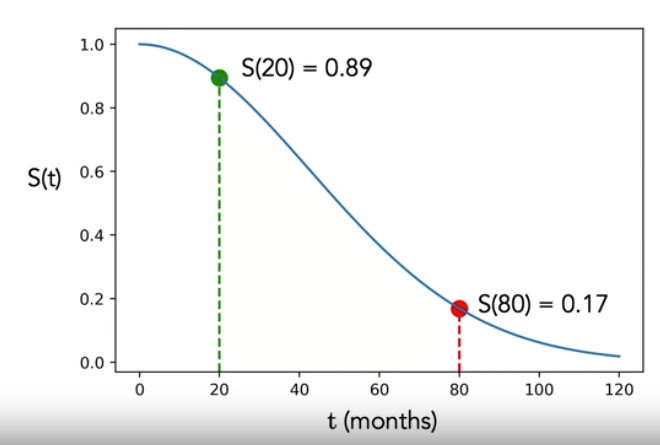

So we have a survival model, which is looking at a patient and outputs the survival function, which is the probability that the time to an event is greater than small t, where the small t could take on any value like 1 year, 5 years, 10 years.

So now we can graphically represent the survival function, where on the x-axis, we will have our time. And this time could be days, months, or years.

And on our y-axis is going to be the survival probability at that time $t$.

So we have time $t$ here, and this is going to be $S(t)$. Let's talk about a few properties of the survival function.

Properties:
1. So the first property is that the survival at any time $u$ is going to be smaller than or equal to survival at any time $v$, if $u$ is greater than or equal to $v$.

$$S(u) \leq S(v)$$  $$  \text{if } u \geq v$$

So what does this mean?

- S(20) = 0.89
- S(80) = 0.17

then $$0.17 \leq 0.89$$
- u = 80
- v = 20

Then: $80 \geq 20$

Let's first pick u to be 80, and we know 80 is greater than equal to 20.

And we can read off on 80, our survival probability was 0.17.

And our survival probability at time v, which is 20, was 0.89.

The survival probability should never go up.

It can either stay the same or it can go down.

2. The second property is that the survival function usually starts off with a survival probability of 1.

$$
\begin{equation}
  S(t)=\begin{cases}
    1, & \text{if $t= 0$}\\
    0, & \text{if $t =\infty$}
  \end{cases}
\end{equation}
$$

There are cases where it doesn't, but we'll mainly focus on this.

The second property is that as time extends on to infinity, our survival probability should get to 0.

And so our survival function should start at a probability of 1 and eventually get to 0.

This particular survival function is going down as time is going on, and starts at 1. So this seems to be a valid survival function. This one over here also starts at 1, seems to be going down. Notice that here it gets to 0. Now, this might initially seem like not a survival function because it doesn't wait till infinity to get to 0, but that's all right. It will stay at 0 as time goes on, and so this is also a valid survival function.



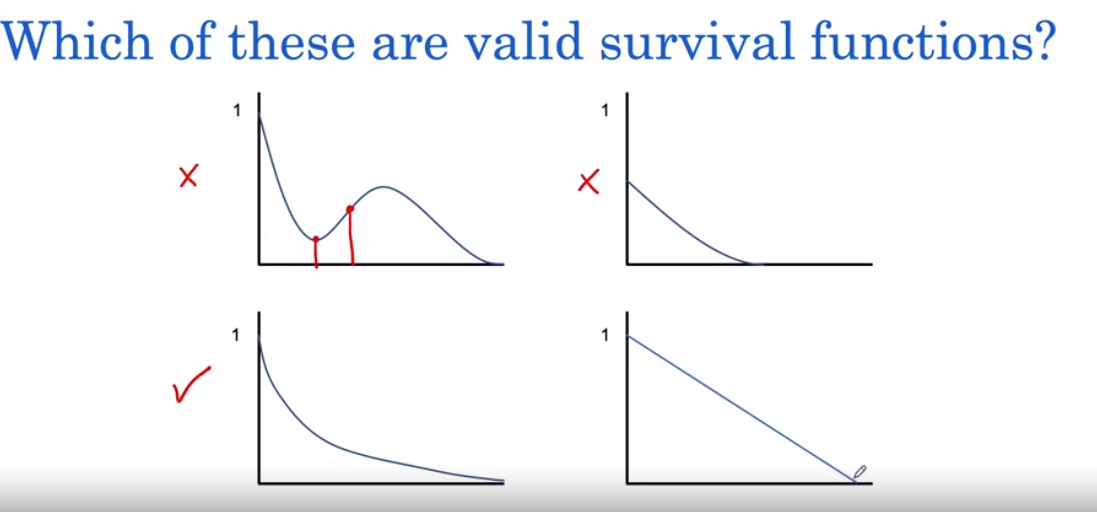

# 2. TIME-to-EVENT

## 2.1. Collecting Time Data

In order to be able to model survival, we need to be able to represent the data in a form which we can process.

The primary challenge is censored observations, which is a particular form of missing data that we will look at next.

Now, previously when we looked at prognostic models where we ask the question, what is the probability of survival past five years?

We had data which looked like the following format, where we had a bunch of patients and for each patient we had their outcome information which said, did I have an event, did I not?


Prognostic models Data- Classification:
- What is the probabilitues of survival past 5 years?

|i|$Y_i$|
|---|---|
|1|1|
|2|0|
|3|0|
|4|1|
|5|0|

- Need : Yes or Not
- 1 - Yes
- 0 - No

So previously we used one for that patient had an event and 0 for that patient did not have an event here presumably in five years.

So that was the data that we used and this was the outcome data that we were using.

Notice the key thing here was that the answers we needed, the outcome we needed, were basically yes or no.

There were ones or zeros that's specified whether there was an event that happened in five years.

But now when we are dealing with survival data, we want to answer a different question.

We want to answer the question, what is the probability of survival not just past five years, but past any time t?

To be able to do that, so we are going to need one information. Let's look at how we can acquire that when information for patients with an example.

Survival Model Data:
- What is the probabilities of survival past any time **t**?

- need WHEN

|1|$Y_i$|
|---|---|
|1||
|2||
|3||


- Treatment Given ----> Stroke Event
- Sep2018  ---> Sep 2019 = Stroke     = 12  monts
- Aug 2018 ---> Oct 2019 = Study Ends = 14 months +
- Aug 2018 ---> Nov 2018 = Withdrow   = 3+ months


|1|$Y_i$|
|---|---|
|1|12|
|2|14+|
|3|3+|

- 2 and 3 - censoring



## 2.2. When a EVENT is Not Observed

(start)0------------------0(Event)

So for the example, we're going to be looking at patients who got a treatment, and we were monitoring them for a some event.

And seeing how much time passed between the treatment till when they got the stroke, if they had a stroke.

And so we have our first patient who got their treatment in September of 2018 and they had a stroke exactly after a year in September 2019.

So for this patient, let's say we were tracking the number of months.

This would be equivalent to 12 months since the time of treatment to having a stroke event.

And so we would enter in this table with the number of months that have passed, that is 12.

Let's look at another patient.

So for this patient, they had their treatment in August 2018 and we tracked them for over a year, until, in October 2019, we decided that our study was going to end. And we did not observe any stroke event during this time period.

So this is August 2018 to August 2019; that's 12 months.

Then September and October, so that's 14 months, where we didn't observe the patient have an event.

So we can say 14 months. But since we know that the patient didn't have an event in 14 months, we know that if they had an event it would have been after 14 months.

And so we write a 14+ there. For our third example this patient had a treatment in August 2018 and just three months later in November 2018 decided that they have to withdraw from the study.

And this happens very commonly for a multitude of reasons. Let's say this patient had to switch countries and therefore had to drop out of the study.

So we know that between August 2018 and November 2018, they did not have a stroke, but we don't know what happened after that.

So we're going to say this patient's time is 3+ months. And so we enter that into a table.

Now the second and this third case is what we call censoring.

And censoring is an important part of survival data which needs to be accounted for.

And something we see all the time where we're trying to see the time to a particular event happening.

But we might not see that event happening for one of a few reasons. And we'll talk about those reasons just in a bit.

For now, all that's important to understand is that there is this censoring observation that we'll have in survival data.




## 2.3. Example



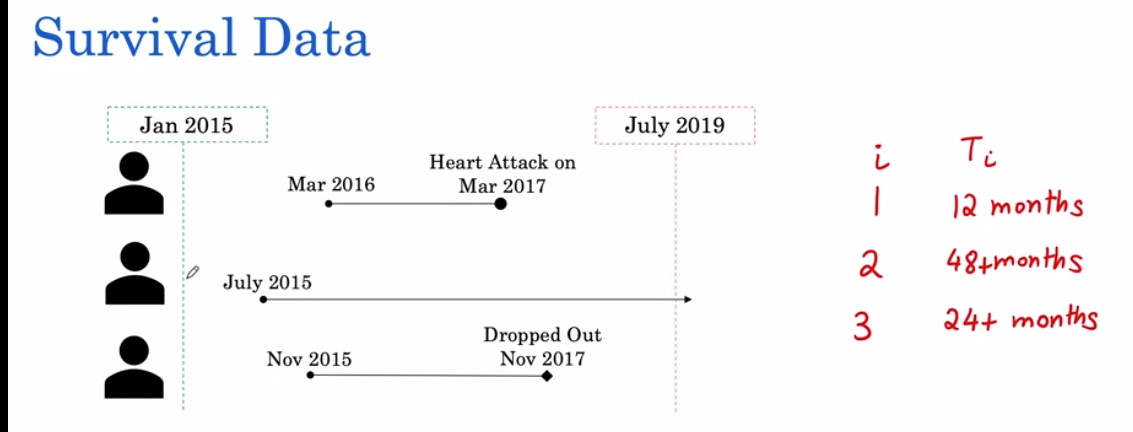

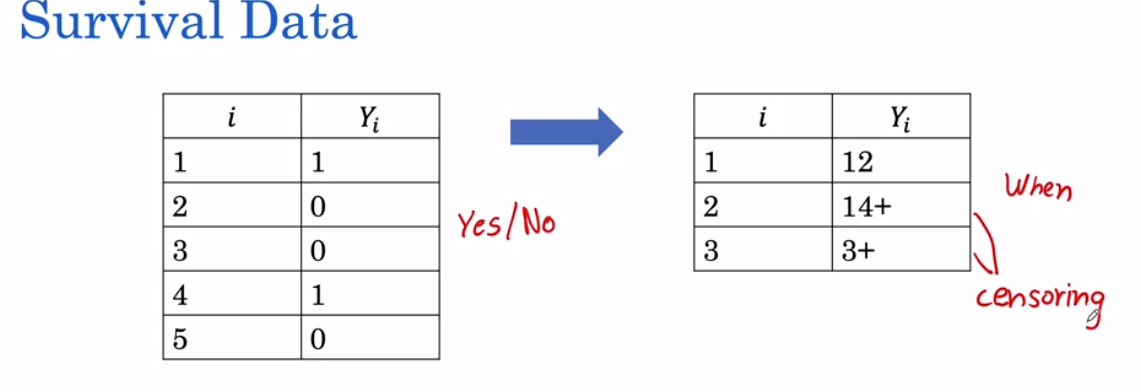

## 2.4. Right Censoring


Aug2018---> Nov2018(Lat Contact)---> Jan2019(Event/Never Gas event/Event always after , if any) == Right censoring

- The time to event i sonly known to exceed a certain value.

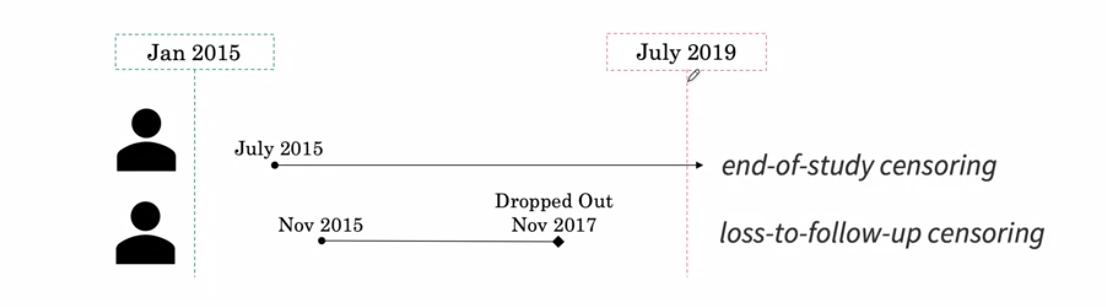

And there are two types of Right Censoring that we've looked at: the first, in which we had a patient who was censored because our study ended, and this is called the end-of-study censoring; and the second type, where we had a patient drop out before the end of the study, and this is called loss-to-follow-up censoring.

Now, censoring is a very important concept in survival data and one that's very necessary to understand to be able to build survival models that we'll look at soon.

# Estimate Survival with Censored Data


## 3.1. Estimating the Survival Function

We'll look at estimating the survival function.

So recall that we've seen survival models where we have patients.

And for those patients, the survival model will tell us the survival function, which is $S(t)$, which can be graphically shown as the following, where for each point in time, we can tell what the survival probability is.

And the survival probability, remember, is just the probability that the time to an event is after some small $t$, where that small $t$ can be one year, it can be five years, it can be 10 years, whatever time we care about.

And we've looked at survival data, where for survival data we have a set of patients for whom we have the outcome information collected in the form of when.

So what was the time to an event? And here we have some observations where we observed the event, and some where we don't observe the event, which we've looked at as being our right-censored data and we have a few of those right-censored observations here.

So we're going to use information that looks like of this form to estimate a survival function.

And we're not building individualized survival functions right now, per patient, we'll look at how to do that later. But right now for any person in the population, we're going to apply the same survival curve that's going to just say for every time t, what is my probability of survival?

And we can read that off from the graph, just one survival function that we apply to the whole population.

## 3.2. Died Immediaterly or Never die

**Estimating Survival**
- what is the probability of survival to t months?
- t=25 months

$S(25)=P(T> 25) = \frac{\text{num.survived to 25 months}}{\text{hurn patients}}$

- pz.survived = 3 and 6 => 2/7 = 0.29

- die emmediately: never dies= 5/7=0.71


|i|$T_i$|S(25)=P(T> 25)|
|---|---||
|1  |10 ||
|2  |8+ |
|3  |60 |
|4  |20 |
|5  |12+|
|6  |30 |
|7  |15+|


And so, we're going to try to model what is the probability of survival to t months.

And for our example, we're going to fix t. Let's take t to be equal to 25 months.

And we're going to look at s at 25, which is simply, remember, the probability that the time to an event happens after 25 months.

And this is the probability of survival to 25 months.

And we can estimate this from the data-- we'll say the way we'll estimate this from the data is by saying the num that survive to 25 months.

And we'll look at the fraction that survive to 25 months by dividing this value by the number of patients that we have in our data.

So let's look at the number that survive to 25 months. We know patient three survived to 25 months. We also know patient 6 survived to 25 months, and the way we know that is that their event times are greater than 25.

Unfortunately, the thing that's making this estimate complicated is that we have these right-censored observations.

Now remember that the problem with the right-censored observations is that we don't know when they had an event; if they had an event at all, we have this lower bound on the time to the event.

And so we have to make an assumption here, and let's try out both the assumptions.

Assumptions:
1. The first assumption that we can make for the censored observations is that they die immediately.

And so, if we have someone who is censored at eight months, let's assume right after we had contact with them, they die. And so the number survive to 25 months, in that case, is only going to include patients three and six, and our denominator is going to be all of the patients, which is going to be 7.

And this estimate comes out to around 0.29. So this is the first assumption where we assume that everyone who is censored just dies immediately.

2. The second assumption we can make is that everyone who's censored never dies.

So patients two, five, and seven just live on forever-- definitely beyond 25 months.

And so we now have three other patients who make it past 25 months, along with their original two patients.

And so our updated estimate is five patients over seven patients, which comes out to a probability of 0.71.

So notice that if we assume that these censored observations all die immediately, the survival probability is much smaller than if we assume that they never die.

Now we know that the reality of the matter is somewhere in between these two values.

## 3.3.Something in-between


|i|$T_i$|Real|
|---|---|---|
|1  |10 |10|
|2  |8+ |*26*|
|3  |60 |60|
|4  |20 |20|
|5  |12+|*51*|
|6  |30 |30|
|7  |15+|*17*|

- S(25)= 4/7=
- Previously" 2/7 = 0.29 and 5/7=0.71

!!! - How to estimate probability of survival past 25 months with censored observations?



So let's assume that we could call up these patients, and we could somehow find out what happened to these censored observations.

So we make some calls, and we can get the real values for these patients, and we see that two of them are greater than 25, one of them is smaller than 25. We can now have our new estimate of our survival at 25, which includes this real information.

And this is going to have the number of patients who survived to 25, and so that's going to be patients 2, 3, 5, and 6. So that's four patients out of seven in total.

And notice that our previous numbers that we had were two over seven, if we assume everyone died immediately, and five over seven, if we assume that the censored observations never experienced the event.

And the reality seems to be somewhere in between that, in between those numbers, where two out of the three patients survived beyond 25 and the one other didn't.

This isn't a problem that shows up all the time, and we unfortunately aren't always able to acquire the reality for the censored observations.

So in that case, we face a very important question that we have to answer with survival models is: how do we estimate the probability of survival past some time t, here 25 months, when we have censored observations without actually making calls to find out what the real event time was?

In [ ]:
import numpy as np
import pandas as pd

We'll work with data where:
- Time: days after a disease is diagnosed and the patient either dies or left the hospital's supervision.
- Event:
    - 1 if the patient died
    - 0 if the patient was not observed to die beyond the given 'Time' (their data is censored)

In [ ]:
df = pd.DataFrame({'Time': [10,8,60,20,12,30,15],
                   'Event': [1,0,1,1,0,1,0]
                  })
df

,Time,Event
0,10,1
1,8,0
2,60,1
3,20,1
4,12,0
5,30,1
6,15,0


1. Count Number of Censored Patients

In [ ]:
df['Event'] == 0

0    False
1     True
2    False
3    False
4     True
5    False
6     True
Name: Event, dtype: bool

Patient 1, 4 and 6 were censored.

- Count how many patient records were censored

When we sum a series of booleans, `True` is treated as 1 and `False` is treated as 0.

In [ ]:
sum(df['Event'] == 0)

3

## Count Number of Patients Who Definitely Survived Past Time $t$

This assumes that any patient who was censored died at the time of being censored ( **died immediately**).

If a patient survived past time `t`:
- Their `Time` of event should be greater than `t`.  
- Notice that they can have an `Event` of either 1 or 0.  What matters is their `Time` value.

In [ ]:
t = 25
df['Time'] > t

0    False
1    False
2     True
3    False
4    False
5     True
6    False
Name: Time, dtype: bool

In [ ]:
sum(df['Time'] > t)

2

## Count Number of Patients Who May Have Survived Past Time $t$

This assumes that censored patients **never die**.
- The patient is censored at any time and we assume that they live forever.
- The patient died (`Event` is 1) but after time `t`

In [ ]:
t = 25
(df['Time'] > t) | (df['Event'] == 0)

0    False
1     True
2     True
3    False
4     True
5     True
6     True
dtype: bool

## Count Number of Patients Who were Not Censored Before Time $t$

If patient was not censored before time `t`:
- They either had an event (death) before `t`, at `t`, or after `t` (any time)
- Or, their `Time` occurs after time `t` (they may have either died or been censored at a later time after `t`)

In [ ]:
t = 25
(df['Event'] == 1) | (df['Time'] > t)

0     True
1    False
2     True
3     True
4    False
5     True
6    False
dtype: bool

In [ ]:
sum( (df['Event'] == 1) | (df['Time'] > t) )

4

## 3.4. Using Censored Data:
0----1----...----25(event)----26 ->

- How to estimate probability of survival past 25 months with censored observations?
$S(25)=P(T> 25)= P(T\geq 26)= P(T\geq 26, T\geq 25, T\geq 24, ..., T\geq 0 )$


|i|$T_i$|
|---|---|
|1  |10 |
|2  |8+ |
|3  |60 |
|4  |20 |
|5  |12+|
|6  |30 |
|7  |15+|

So we're going to estimate the probability of survival past 25 months with censored observations.

And so, we'll start off with a number line, where we have time points from zero, one, all the way to 25 and beyond.

And notice that we're considering discrete points in time, such that our events are happening at either one or two or three; they're not happening in between.

And so, we'll start by estimating the probability of survival past 25 months with censored observations, by writing down what this means.

So we have S of 25, which is the probability that our time to an event is after 25.

Now, notice that if an event happens after 25, that means it happens after or at 26.

So we can have that modification that we make, and we'll see why this is useful in just a second.

Now, the probability that the time to the event is after or at 26 months, and we're going to expand this out. What does it mean for the time to an event to be after or at 26?

It means the same thing as the time to event happened after 26 and after 25, and after 24, all the way to it happening right after or at zero.

The reason we can do this is because this implies this. So we know that the time to an event, if it happens after or at 26, all the following must hold true.

## 3.5. Chain Rule of Conditional Probability

So we have our S(25) as the probability that T is greater than equal to 26, greater than equal to 25 so on and so forth, up to zero.

And the reason we got it to this stage is now we can use the chain rule of conditional probability to break this down even further.

And so we can use the chain rule of conditional probability which remember just says the probability of two events and be occurring is the probability of A occurring given B times the probability of B occurring.

And this can be expanded out to multiple events A, B and C. And this is going to come out to the probability of A given B,C times the probability of B given C times the probability of C.

We just want to know that this exists and we can apply it to this formulation right here to break it down.

And the way we'll break it down is to say this is the same as the probability that T is greater than equal to 26, given T is greater than equal to 25 times the probability that T.

Is greater than equal to 25 given T is greater than equal to 24, so on and so forth until we reach P(T) is greater than equal to one, given T is greater than equal to zero.

Finally times P of T is created than equal to zero as our final term on there.

And so we've just applied the chain rule of conditional probability to simplify this expression into that one. Now we know that all events happen at or after zero, so this term is just going to end up being one, and we don't really need to include this term in our multiplication.

- if event is in 26 moths
$S(25)=P(T> 25)= P(T\geq 26)= P(T\geq 26, T\geq 25, T\geq 24, ..., T\geq 0 )$

- $P(A,B)= P(A|B)P(B)$
- $P(A,B,C)= P(A|B,C)P(B|C)P(C)$

- $P(T \geq 26|T\geq 25)P(T\geq25|T\geq24)...P(T\geq1|T\geq0)P(T\geq0)$

## 3.6. Deriving Survival:

So we've represented the survival probability in this following expression, that's saying the probability that I survive to 25 is a product of a bunch of probabilities, which says, if I get to 25, what is the probability I get to 26?

Multiply that by what's the probability I get to 25 given I get to 24, so on and so forth, until we get to the start of time where we're asking the question, if we survive 0, what is the probability that we survive 1?

So we're making these little steps on this timeline to get up to the survival probability we care about here, which is 25.

We're going to modify this expression a little more by understanding how this can break down even further.

So we have the probability that T is greater than/equal to 26.

The probability that T is greater than/ equal to 26 is also the probability that T is greater than 25.

We can write this down as the probability that this person has their event after 25, given that they had their event at or after 25.

Now notice that this is simply 1 minus the probability that the event happened exactly at time 25 months, given it happened at or after 25 months.

So let's look at what's happening here.

We're looking at the probability that the event happens after 25 months, given it happens at or after 25 months.

And this is going to be 1 minus the probability that it happens at 25 months, given it happens at or after 25 months.

So we're going to use this to extend this expression a little further to say S of 25 is going to be 1 minus probability of having an event at 25 months, given it happens at or after 25 months, and this is going to be the first term.

And the second term is going to be 1 minus the probability that it happens at 24 months, given it happens at or after 24 months. And so on and so forth until we get to our last term, which is going to be 1 minus the probability that it happens at 0, given it happens at or after 0.

So we're going to see next why it is useful to represent the survival probability in the following way.

- $S(25)= P(T \geq 26|T\geq 25)P(T\geq25|T\geq24)...P(T\geq1|T\geq0)P(T\geq0)$

- If we take that:

- $P(T \geq 26|T\geq 25) = P(T > 25|T\geq 25)= 1-P(T=25|T\geq 25)$

- $S(25)= (1-P(T=25|T\geq25))(1-P(T=24|T\geq24))...(1-P(T=0|T\geq 0))$

## 3.7. Calculating Probabilities from the data

$(1-P(T=25|T\geq25)) -> 1-0 $  

$P(T=25|T\geq25)\frac{\text{# died at 25}}{\text{# know to survive to 25}} = \frac{0}{2} = 0$

$S(25)= (1-P(T=20|T\geq20))(1-P(T=10|T\geq10))=  (1- \frac{1}{3})(1-\frac{1}{6})= \frac{2}{3}* \frac{5}{6}= \frac{10}{18}= 0.56$


So we've seen how we can represent the survival function using the following expression, and the benefit of using this expression is we can directly estimate this quantity from data.

So the probability that the time to event is at a given time can be estimated by looking at the number of patients who died at that time, so the number of patients who died at 25.

In the denominator, we're going to look at the patients who have a time to event at or after 25, so this is going to be the number known to survive to 25.

So we can estimate this quantity directly from data, by looking at the number of patients who died at 25.

And we see that no patients died exactly at time 25, so our numerator is 0.

Now in the denominator, we're looking at the number of patients known to survive to 25.

So scanning through these patients, patient three survives to 25 and patient six is known to survive to 25, because they have event times or censoring times after 25, and so the denominator here is 2.

So we have here 1 minus 0, which is going to come out for 1 for this expression over here, and the reason for this is that we didn't have any patients who died at 25.

And this is going to be true for most times in this expression, we're not going to have patients that died.

In fact, the only two times for which we're going to see patients die before 25, are going to be for patient 1, at a time of 10, and for patient 4, at a time of 20.

So this expression simplifies into computing this expression at those two times, so we have 1 minus the probability T equals 20, given T is at or after 20, times 1 minus the probability that T is equal to 10, given T is at or after 10.

And so we have seen how we can simplify this expression to have these two terms, let's see how we can simplify it even further.

So we can evaluate this first quantity using data by looking at the number of patients who died at 20 in the numerator, that's going to be 1, that's patient four, and in the denominator, the number of patients that are known to have survived to 20, and so we can walk through the patients.

See that patient three has survived up to 20, so is patient four and patient six.

So that's three patients, and we can have the 1 minus this quantity.

And here we have 1 minus; we'll apply the same logic here, when the numerator will look at the number of events at time 10, there's one, and we look at the number of events at or after time 10, so this is 1, 2, 3, 4, 5, 6. So we have 6 here and now we can complete this computation where the first part evaluates the 2 over 3 and the second part to 5 over 6, to get us to 10 over 18.

We can simplify that to 5 over 9, which comes around 0.56.

## 3.8. Comparing Estimates

So we have a new estimate of the survival at time 25, which comes out to 0.56. Let's compare this to the estimates we had previously made. So when we had made the assumption that all patients died immediately at their censoring time, we had got a low survival probability of 0.29. On the other extreme, if we assume that all of the censored observations continued to live to the end of time, then we had a survival estimate of 0.71. We also looked at what would have happened if we had access to the real event times in the data, which is not something we can usually observe, but we had this hypothetical scenario in which we could call up the patients and find out the event times. We had a real estimate that we could compute based on that. We can see that our new estimate, which takes into account censored observations, is much closer to the real estimate than we could get with either of our two extreme observations. So we've seen how we can estimate survival probability in the presence of censored observations. So now that we've seen how to estimate the probability of survival past 25 months with censored observations, let's look at how we can generalize that to any time small t. Let's see if we can generalize this expression we saw earlier to have any time small t. So here we can represent the survival at any point t as a product. We can write in product notation of i, starting at time zero and extending all the way to the time t, and then in this we're going to have 1 minus the probability that the time to an event is at the time i, given it's at or after i. So this is simply writing down for any time t what this expression would look like. So now we've seen how we can directly estimate this quantity from data as the number of patients who died at the time. So the time here is i divided by the number that are known to survive to i. We can have a shorthand notation for the numerator of di and for the denominator as ni, which brings us to this expression for the survival function, which is the survival at time t is the product from i equals 0 to t of 1 minus di over ni.

|i|$T_i$|Real|
|---|---|---|
|1  |10 |10|
|2  |8+ |*26*|
|3  |60 |60|
|4  |20 |20|
|5  |12+|*51*|
|6  |30 |30|
|7  |15+|*17*|

- New estimate= 5/9= 0.56
- if all assumed dead- 2/7 =0.29
- if all assumed alive= 5/7=0.71
- real - 2/7 = 0.57

How to estimate probability of survival past 25 months with censored observations?

- $S(25)= (1-P(T=25|T\geq25))(1-P(T=24|T\geq24))...(1-P(T=0|T\geq 0))$

-$S(t)= \prod_{i=0}^t (1-P(T=i|T\geq i))= \frac{\text{# died at i}}{ \text{# known survive to i}}$

- $S(T)= \prod_{i=0}^t 1-\frac{d_i}{n_i}$


|i|$T_i$|
|---|---|
|1  |10 |
|2  |8+ |
|3  |60 |
|4  |20 |
|5  |12+|
|6  |30 |
|7  |15+|

## 3.9. Kaplan Maier Estimate


So this is the Kaplan-Meier Estimate, which allows us to get a survival function that we estimate from a population.

And so, what we did was we're able to represent the population using survival data from which we built the Kaplan-Meier survival model.

The key thing about this model is that the survival function that we estimate is applied to all the patients in the population; it isn't specific to a particular patient.

We can compute the Kaplan-Meier curves, or the survival curves, for two different populations and compare them against each other.

So for example, let's say we wanted to know the prognosis for patients with stage 3 cancer and with stage 4 cancer.

We can build two separate survival functions, using the Kaplan-Meier estimate, and we can graph the Kaplan-Meier estimates for the survival on the same plot.

So here in orange, we have the plot for the Kaplan-Meier estimate of the survival for stage 4, and, in blue, for stage 3. So if you wanted to tell the prognosis or the survival probability for any patient in the population, we would simply look up given a time, let's say 50, what the survival probability, or the y-value, was at that point to tell the difference in the survival probabilities for patients between the two populations.

And so we've seen how we can use the Kaplan-Meier estimate to be able to get the survival curves.

This week, we discussed the problem of survival analysis.

Using survival modeling, we saw how we can now model survival up to any time t.

We looked at one of the key features of data in survival analysis: right censoring. Right censoring, as we saw, is a form of missing data problem, in which time to the event is not observed because the study was terminated, or because the patient left the study prior to experiencing an event.

We finally looked at the Kaplan-Meier estimator, which takes censored observations into account to estimate a survival function for the whole population.

What we haven't looked at yet is how we can make individualized estimate of survival for patients by taking into account their particular profile.


|i|$T_1$stage-1|$T_2$stage-2 |
|---|---|---|
|1  |10 |9  |
|2  |8+ |15+|
|3  |60 |30 |
|4  |20 |10 |
|5  |12+|5  |
|6  |30 |8+ |
|7  |15+|13 |

Fig Kaplan Maier here !!!

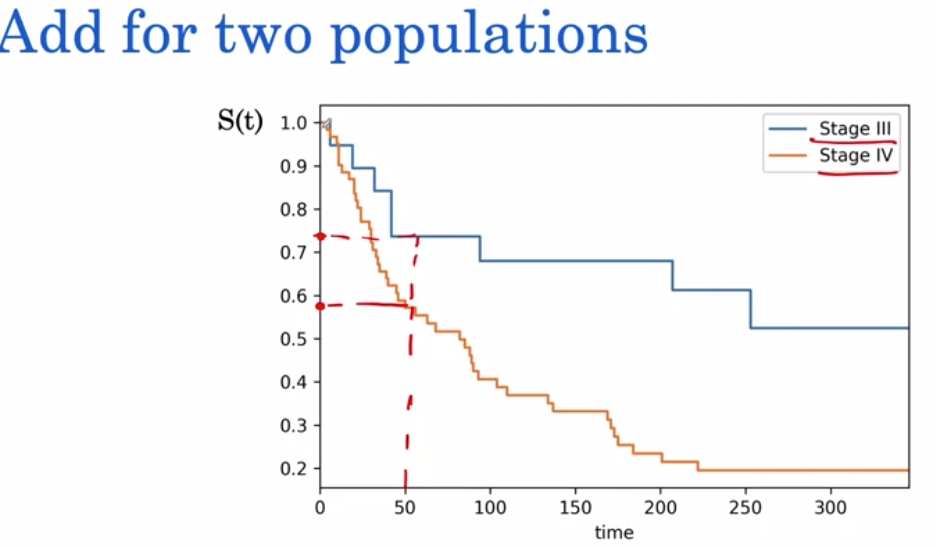

The Kaplan Meier estimate of survival probability is:

$$
S(t) = \prod_{t_i \leq t} (1 - \frac{d_i}{n_i})
$$

- $t_i$ are the events observed in the dataset
- $d_i$ is the number of deaths at time $t_i$
- $n_i$ is the number of people who we know have survived up to time $t_i$.



In [ ]:
df = pd.DataFrame({'Time': [3,3,2,2],
                   'Event': [0,1,0,1]
                  })
df

,Time,Event
0,3,0
1,3,1
2,2,0
3,2,1


#### Find Those Who Survived Up to Time $t_i$

If they survived up to time $t_i$,
- Their `Time` is either greater than $t_i$
- Or, their `Time` can be equal to $t_i$

In [ ]:
t_i = 2
df['Time'] >= t_i

You can use this to help you calculate $n_i$

#### Find Those Who Died at Time $t_i$

- If they died at $t_i$:
- Their `Event` value is 1.  
- Also, their `Time` should be equal to $t_i$

In [ ]:
t_i = 2
(df['Event'] == 1) & (df['Time'] == t_i)

0    False
1    False
2    False
3     True
dtype: bool



You can use this to help you calculate $d_i$



Welcome to the third assignment of Course 2. In this assignment, we'll use Python to build some of the statistical models we learned this past week to analyze surivival estimates for a dataset of lymphoma patients. We'll also evaluate these models and interpret their outputs. Along the way, you will be learning about the following:

- Censored Data
- Kaplan-Meier Estimates
- Subgroup Analysis

In [ ]:
pip install lifelines

In [ ]:
from lifelines.datasets import load_lymphoma


def load_data():
    df = load_lymphoma()
    df.loc[:, 'Event'] = df.Censor
    df = df.drop(['Censor'], axis=1)
    return df

In [ ]:
import lifelines
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lifelines import KaplanMeierFitter as KM
from lifelines.statistics import logrank_test

In [ ]:
data = load_data()

In [ ]:
print("data shape: {}".format(data.shape))
data.head()

data shape: (80, 3)


,Stage_group,Time,Event
0,1,6,1
1,1,19,1
2,1,32,1
3,1,42,1
4,1,42,1


The column `Time` states how long the patient lived before they died or were censored.

The column `Event` says whether a death was observed or not. `Event` is 1 if the event is observed (i.e. the patient died) and 0 if data was censored.

Censorship here means that the observation has ended without any observed event.
For example, let a patient be in a hospital for 100 days at most. If a patient dies after only 44 days, their event will be recorded as `Time = 44` and `Event = 1`. If a patient walks out after 100 days and dies 3 days later (103 days total), this event is not observed in our process and the corresponding row has `Time = 100` and `Event = 0`. If a patient survives for 25 years after being admitted, their data for are still `Time = 100` and `Event = 0`.

#### Censored Data

We can plot a histogram of the survival times to see in general how long cases survived before censorship or events.

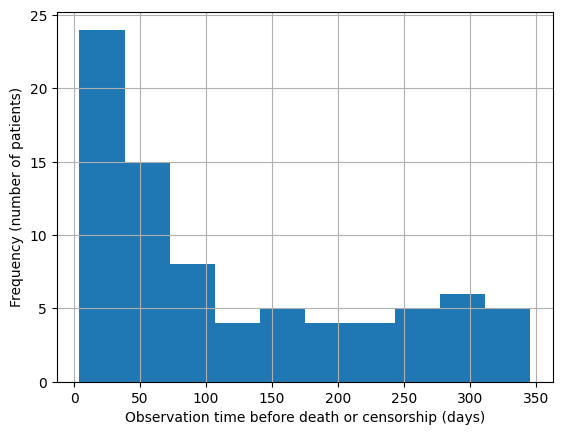

In [ ]:
data.Time.hist();
plt.xlabel("Observation time before death or censorship (days)");
plt.ylabel("Frequency (number of patients)");
# Note that the semicolon at the end of the plotting line
# silences unnecessary textual output - try removing it
# to observe its effect

to compute the fraction ($\in [0, 1]$) of observations which were censored.

In [ ]:
data[data["Event"]==0]["Event"]

5     0
7     0
8     0
10    0
11    0
13    0
14    0
15    0
16    0
17    0
18    0
42    0
43    0
48    0
49    0
62    0
70    0
71    0
72    0
73    0
74    0
75    0
76    0
77    0
78    0
79    0
Name: Event, dtype: int64

In [ ]:
# Summing up the 'Event' column will give you the number of observations where censorship has NOT occurred.

def frac_censored(df):
    """
    Return percent of observations which were censored.

    Args:
        df (dataframe): dataframe which contains column 'Event' which is
                        1 if an event occurred (death)
                        0 if the event did not occur (censored)
    Returns:
        frac_censored (float): fraction of cases which were censored.
    """
    result = 0.0

    result =len(df[df["Event"]==0]["Event"])/len(df)

    return result

In [ ]:
print(frac_censored(data))

0.325


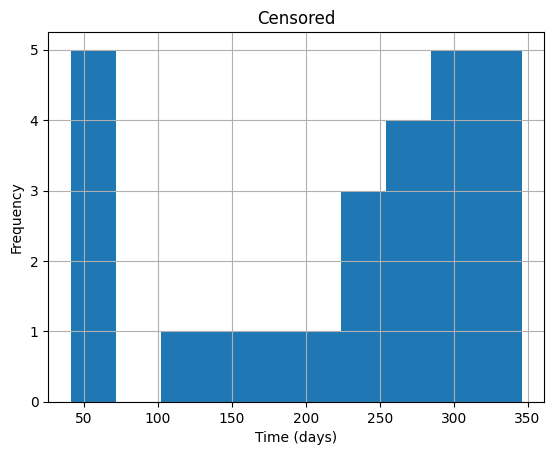

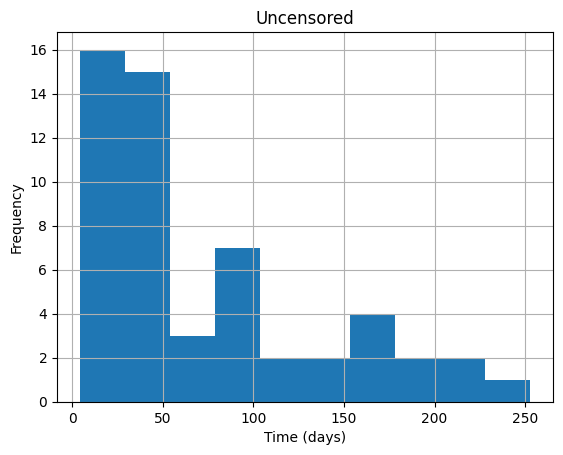

In [ ]:
# Run the next cell to see the distributions of survival times for censored and uncensored examples.
df_censored = data[data.Event == 0]
df_uncensored = data[data.Event == 1]

df_censored.Time.hist()
plt.title("Censored")
plt.xlabel("Time (days)")
plt.ylabel("Frequency")
plt.show()

df_uncensored.Time.hist()
plt.title("Uncensored")
plt.xlabel("Time (days)")
plt.ylabel("Frequency")
plt.show()

## Survival Estimates

We'll now try to estimate the survival function:

$$
S(t) = P(T > t)
$$

To illustrate the strengths of Kaplan Meier, we'll start with a naive estimator of the above survival function. To estimate this quantity, we'll divide the number of people who we know lived past time $t$ by the number of people who were not censored before $t$.

Formally, let $i$ = 1, ..., $n$ be the cases, and let $t_i$ be the time when $i$ was censored or an event happened. Let $e_i= 1$ if an event was observed for $i$ and 0 otherwise. Then let $X_t = \{i : T_i > t\}$, and let $M_t = \{i : e_i = 1 \text{ or } T_i > t\}$. The estimator you will compute will be:

$$
\hat{S}(t) = \frac{|X_t|}{|M_t|}
$$

In [ ]:
# Write a function to compute this estimate for arbitrary  t  in the cell below.
def naive_estimator(t, df):
    """
    Return naive estimate for S(t), the probability
    of surviving past time t. Given by number
    of cases who survived past time t divided by the
    number of cases who weren't censored before time t.

    Args:
        t (int): query time
        df (dataframe): survival data. Has a Time column,
                        which says how long until that case
                        experienced an event or was censored,
                        and an Event column, which is 1 if an event
                        was observed and 0 otherwise.
    Returns:
        S_t (float): estimator for survival function evaluated at t.
    """
    S_t = 0.0

    X_t = len(df[df["Time"]>t])
    M_t = len(df[(df["Time"]>t) | (df["Event"]==1)])
    S_t = X_t/M_t

    return S_t

In [ ]:
print("Test Cases")

sample_df = pd.DataFrame(columns = ["Time", "Event"])
sample_df.Time = [5, 10, 15]
sample_df.Event = [0, 1, 0]
print("Sample dataframe for testing code:")
print(sample_df)
print("\n")

print("Test Case 1: S(3)")
print("Output: {}, Expected: {}\n".format(naive_estimator(3, sample_df), 1.0))

print("Test Case 2: S(12)")
print("Output: {}, Expected: {}\n".format(naive_estimator(12, sample_df), 0.5))

print("Test Case 3: S(20)")
print("Output: {}, Expected: {}\n".format(naive_estimator(20, sample_df), 0.0))

# Test case 4
sample_df = pd.DataFrame({'Time': [5,5,10],
                          'Event': [0,1,0]
                         })
print("Test case 4: S(5)")
print(f"Output: {naive_estimator(5, sample_df)}, Expected: 0.5")

Test Cases
Sample dataframe for testing code:
   Time  Event
0     5      0
1    10      1
2    15      0


Test Case 1: S(3)
Output: 1.0, Expected: 1.0

Test Case 2: S(12)
Output: 0.5, Expected: 0.5

Test Case 3: S(20)
Output: 0.0, Expected: 0.0

Test case 4: S(5)
Output: 0.5, Expected: 0.5


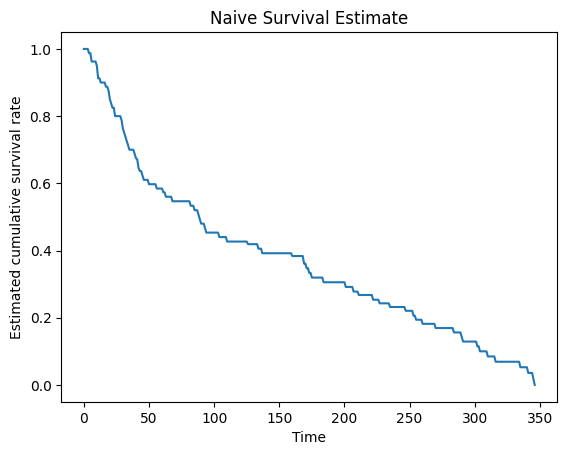

In [ ]:
# we will plot the naive estimator using the real data up to the maximum time in the dataset.

max_time = data.Time.max()
x = range(0, max_time+1)
y = np.zeros(len(x))
for i, t in enumerate(x):
    y[i] = naive_estimator(t, data)

plt.plot(x, y)
plt.title("Naive Survival Estimate")
plt.xlabel("Time")
plt.ylabel("Estimated cumulative survival rate")
plt.show()


Next let's compare this with the Kaplan Meier estimate. In the cell below, write a function that computes the Kaplan Meier estimate of $S(t)$ at every distinct time in the dataset.

Recall the Kaplan-Meier estimate:

$$
S(t) = \prod_{t_i \leq t} (1 - \frac{d_i}{n_i})
$$

where $t_i$ are the events observed in the dataset and $d_i$ is the number of deaths at time $t_i$ and $n_i$ is the number of people who we know have survived up to time $t_i$.

In [ ]:
def HomemadeKM(df):
    """
    Return KM estimate evaluated at every distinct
    time (event or censored) recorded in the dataset.
    Event times and probabilities should begin with
    time 0 and probability 1.

    Example:

    input:

         Time  Censor
    0     5       0
    1    10       1
    2    15       0

    correct output:

    event_times: [0, 5, 10, 15]
    S: [1.0, 1.0, 0.5, 0.5]

    Args:
        df (dataframe): dataframe which has columns for Time
                          and Event, defined as usual.

    Returns:
        event_times (list of ints): array of unique event times
                                      (begins with 0).
        S (list of floats): array of survival probabilites, so that
                            S[i] = P(T > event_times[i]). This
                            begins with 1.0 (since no one dies at time
                            0).
    """
    # individuals are considered to have survival probability 1
    # at time 0
    event_times = [0]
    p = 1.0
    S = [p]


    # get collection of unique observed event times
    observed_event_times = df["Time"].unique()

    # sort event times
    observed_event_times = sorted(observed_event_times)

    # iterate through event times
    for t in observed_event_times:

        # compute n_t, number of people who survive to time t
        n_t = len(df[df["Time"]>=t])

        # compute d_t, number of people who die at time t
        d_t = len(df[(df["Time"]==t) & (df["Event"]==1)])

        # update p
        p = p * (1 - (d_t/n_t))
        S.append(p)
        event_times.append(t)

        # update S and event_times (ADD code below)
        # hint: use append

    return event_times, S

In [ ]:
print("TEST CASES:\n")


print("Test Case 1\n")

print("Test DataFrame:")
sample_df = pd.DataFrame(columns = ["Time", "Event"])
sample_df.Time = [5, 10, 15]
sample_df.Event = [0, 1, 0]
print(sample_df.head())
print("\nOutput:")
x, y = HomemadeKM(sample_df)
print("Event times: {}, Survival Probabilities: {}".format(x, y))
print("\nExpected:")
print("Event times: [0, 5, 10, 15], Survival Probabilities: [1.0, 1.0, 0.5, 0.5]")

print("\nTest Case 2\n")

print("Test DataFrame:")

sample_df = pd.DataFrame(columns = ["Time", "Event"])
sample_df.loc[:, "Time"] = [2, 15, 12, 10, 20]
sample_df.loc[:, "Event"] = [0, 0, 1, 1, 1]
print(sample_df.head())
print("\nOutput:")
x, y = HomemadeKM(sample_df)
print("Event times: {}, Survival Probabilities: {}".format(x, y))
print("\nExpected:")
print("Event times: [0, 2, 10, 12, 15, 20], Survival Probabilities: [1.0, 1.0, 0.75, 0.5, 0.5, 0.0]")

TEST CASES:

Test Case 1

Test DataFrame:
   Time  Event
0     5      0
1    10      1
2    15      0

Output:
Event times: [0, 5, 10, 15], Survival Probabilities: [1.0, 1.0, 0.5, 0.5]

Expected:
Event times: [0, 5, 10, 15], Survival Probabilities: [1.0, 1.0, 0.5, 0.5]

Test Case 2

Test DataFrame:
   Time  Event
0     2      0
1    15      0
2    12      1
3    10      1
4    20      1

Output:
Event times: [0, 2, 10, 12, 15, 20], Survival Probabilities: [1.0, 1.0, 0.75, 0.5, 0.5, 0.0]

Expected:
Event times: [0, 2, 10, 12, 15, 20], Survival Probabilities: [1.0, 1.0, 0.75, 0.5, 0.5, 0.0]


<ipython-input-33-1f0bf00da9b8>:23: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sample_df.loc[:, "Event"] = [0, 0, 1, 1, 1]


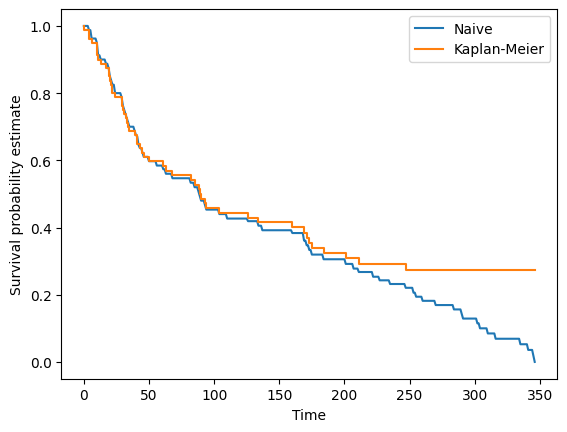

In [ ]:
# Now let's plot the two against each other on the data to see the difference.

max_time = data.Time.max()
x = range(0, max_time+1)
y = np.zeros(len(x))
for i, t in enumerate(x):
    y[i] = naive_estimator(t, data)

plt.plot(x, y, label="Naive")

x, y = HomemadeKM(data)
plt.step(x, y, label="Kaplan-Meier")
plt.xlabel("Time")
plt.ylabel("Survival probability estimate")
plt.legend()
plt.show()

What differences do you observe between the naive estimator and Kaplan-Meier estimator? Do any of our earlier explorations of the dataset help to explain these differences?

#### Subgroup Analysis
We see that along with Time and Censor, we have a column called Stage_group.

A value of 1 in this column denotes a patient with stage III cancer
A value of 2 denotes stage IV.
We want to compare the survival functions of these two groups.

This time we'll use the KaplanMeierFitter class from lifelines. Run the next cell to fit and plot the Kaplan Meier curves for each group.

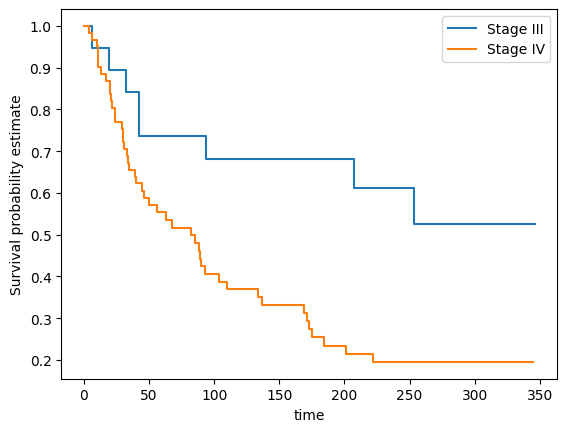

In [ ]:
S1 = data[data.Stage_group == 1]
km1 = KM()
km1.fit(S1.loc[:, 'Time'], event_observed = S1.loc[:, 'Event'], label = 'Stage III')

S2 = data[data.Stage_group == 2]
km2 = KM()
km2.fit(S2.loc[:, "Time"], event_observed = S2.loc[:, 'Event'], label = 'Stage IV')

ax = km1.plot(ci_show=False)
km2.plot(ax = ax, ci_show=False)
plt.xlabel('time')
plt.ylabel('Survival probability estimate')
plt.savefig('two_km_curves', dpi=300)

In [ ]:
# Let's compare the survival functions at 90, 180, 270, and 360 days
survivals = pd.DataFrame([90, 180, 270, 360], columns = ['time'])
survivals.loc[:, 'Group 1'] = km1.survival_function_at_times(survivals['time']).values
survivals.loc[:, 'Group 2'] = km2.survival_function_at_times(survivals['time']).values
survivals

,time,Group 1,Group 2
0,90,0.736842,0.424529
1,180,0.680162,0.254066
2,270,0.524696,0.195436
3,360,0.524696,0.195436


This makes clear the difference in survival between the Stage III and IV cancer groups in the dataset.

#### Log-Rank Test

To say whether there is a statistical difference between the survival curves we can run the log-rank test. This test tells us the probability that we could observe this data if the two curves were the same. The derivation of the log-rank test is somewhat complicated, but luckily `lifelines` has a simple function to compute it.

Run the next cell to compute a p-value using `lifelines.statistics.logrank_test`.

In [ ]:
def logrank_p_value(group_1_data, group_2_data):
    result = logrank_test(group_1_data.Time, group_2_data.Time,
                          group_1_data.Event, group_2_data.Event)
    return result.p_value

logrank_p_value(S1, S2)

0.009588929834755544

If everything is correct, you should see a p value of less than 0.05, which indicates that the difference in the curves is indeed statistically significant.

# Survival and Hazard Functions





## Hazard

Survival question: What is the probability of survival past any time $t$?

Hazard question: What is a patient's immediate risk of death if they make i to time $t$?
 - more at risk in year 1 or year 10
 - inform treatment


But let's say we were interested in now a different question, not what the probability of survival past anytime t is, but what a patient's immediate risk of death is, if they make it to some time t?

And we might want to know this to understand whether a patient is more at risk in year 1 or in year 10, and we can use this information to then inform treatment when the patient is most at risk.

So how do we represent a patient's immediate risk of death, if they make it to time t?

So this is what's called the hazard, and the hazard is represented by the Greek letter small lambda.

And the hazard of t is the probability that the time to an event is at t, given it is at or after t.

And the interpretation of this is, what is the risk of death if someone is age t?

What is the immediate risk of death if they make it to time t?

And that's what the hazard is.

And like the survival function, the hazard function can be represented graphically.

So once again, we have t on the x-axis, and now we have small lambda t on the y-axis, and it's telling us as time goes on, what is our hazard at that particular time?

So notice from the shape, we can tell what a patient's hazard is, what a patient's instantaneous risk of death is at any point in time.

We can see that it's highest at zero, and then drops rapidly to 4, and then increases again to the time of 10, where it's getting to a similar hazard as a time of zero.

And so this allows us to see that the patient's risk is high in this area, not so high in this area, and again growing later.

And this is what's called a bathtub curve, where the risk of death is very high immediately at time zero, and then goes down, and then increases with time.

And this can happen, let's say with some treatment like surgery where the risk of complications immediately might be very high, but then they go down over time. But then, the patient's risk increases as time goes on.



Hazard function:

$\lambda(t)= P(T=t|T \geq t)$




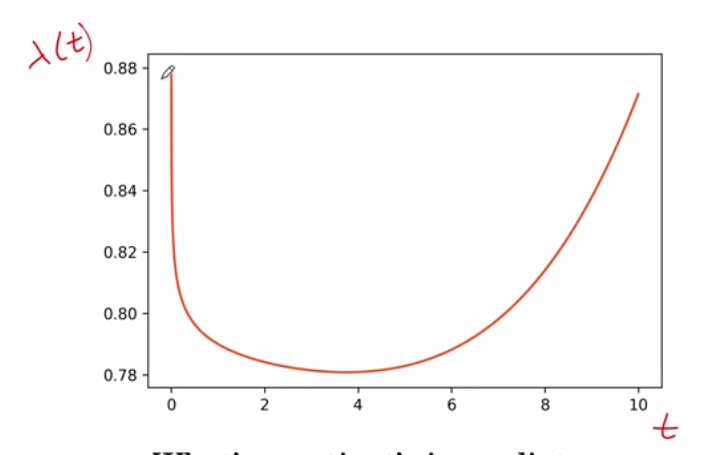

## Survival to Hazard:

$S(t)= exp[- \int_0^t \lambda(u) du]$

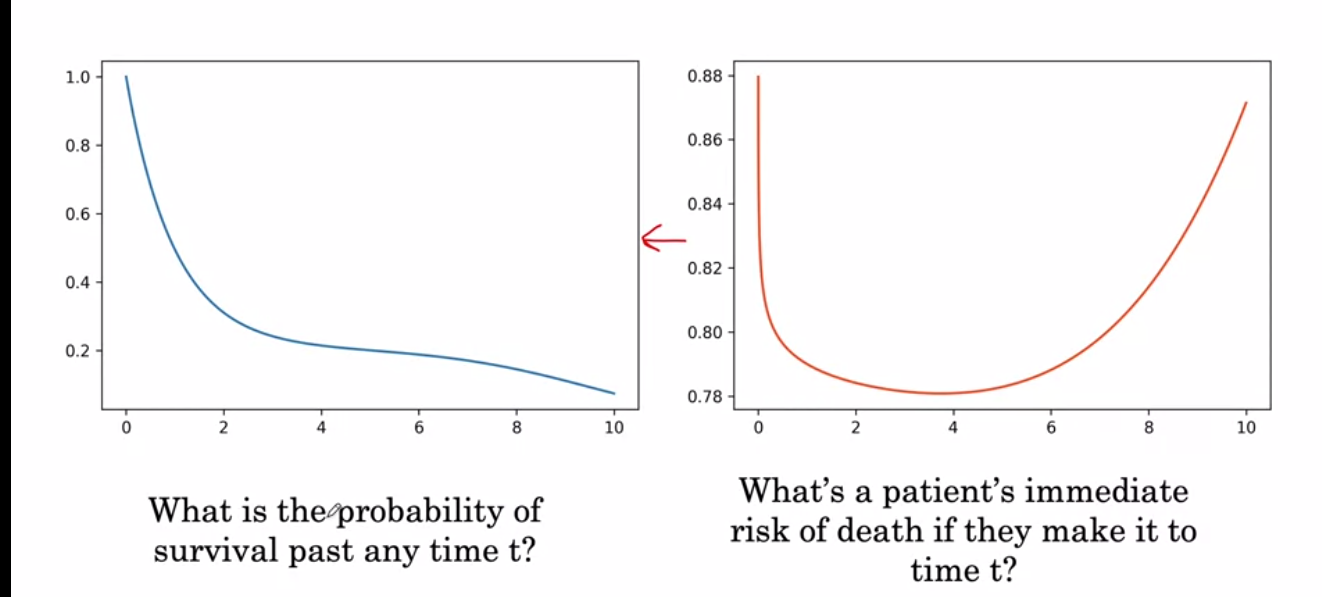

rate of death if aged t

$\lambda(t)= - \frac{S'(t)}{S(t)}$



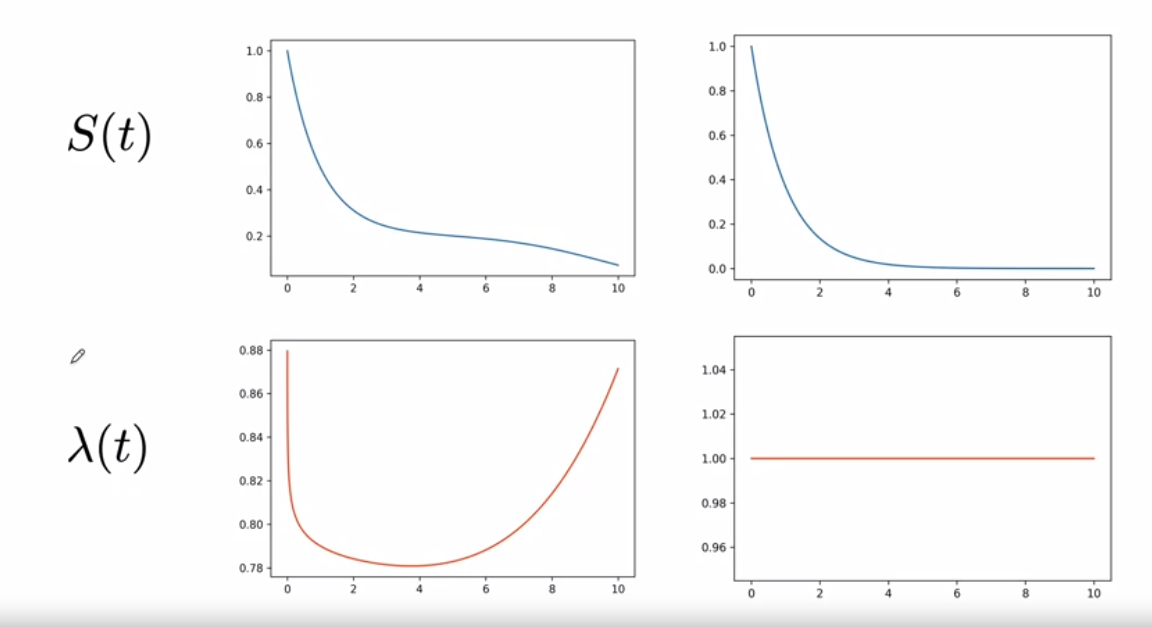

## Cumulative Hazard

- $\lambda(t)$ : what is a patient's immediate risk of death if they make it to time t?

$\Lambda(t)$: What is the patient's accumulated hazard upto time t?

$$\Lambda(t)= \Lambda(3) = \lambda(0) + \lambda(1) + \lambda(2) +\lambda(3)$$

$\Lambda(t)= \sum_{i=0}^t \lambda(i)$
- t=0,1,2,3 = [0,...,3]

- $\lambda(t) = \int_0^t \lambda(i)di$

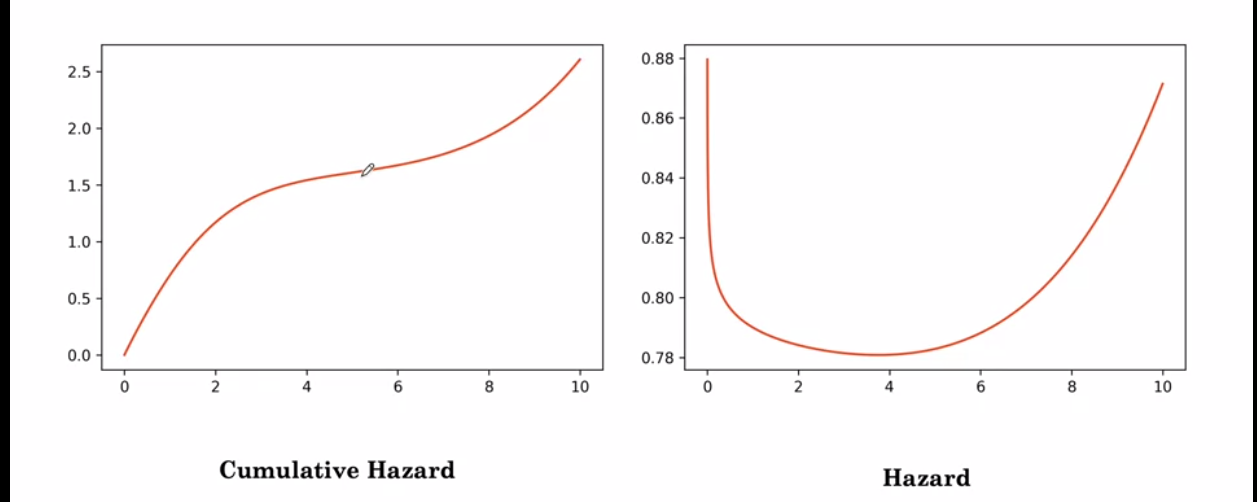

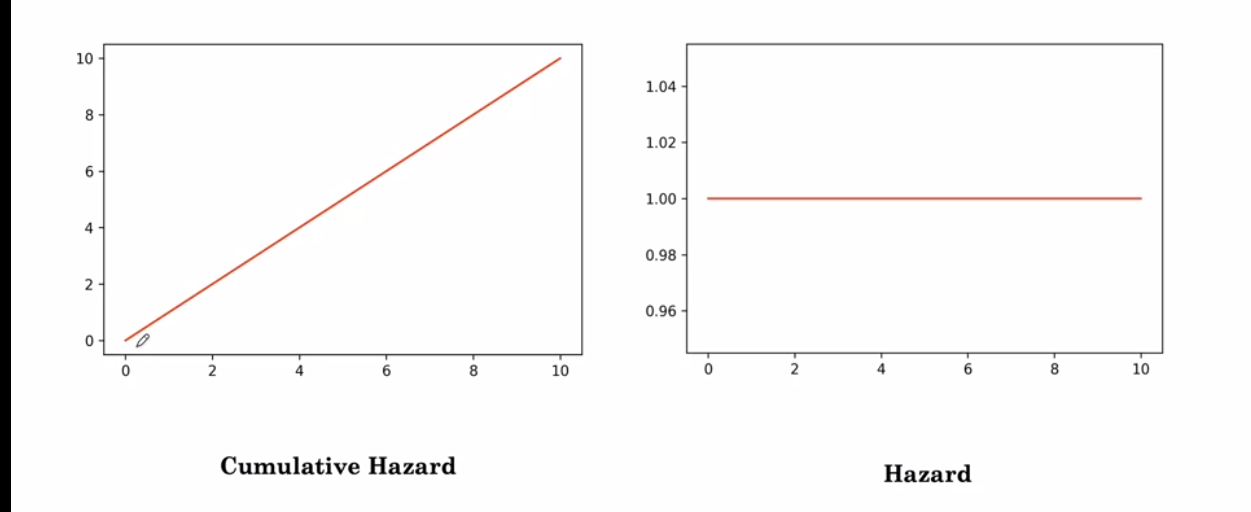

$$S(t)<=> \lambda(t) <=> \Lambda(t)$$

## LAB

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'ascites': [0,1,0,1],
                   'edema': [0.5,0,1,0.5],
                   'stage': [3,4,3,4],
                   'cholesterol': [200.5,180.2,190.5,210.3]
                  })
df

,ascites,edema,stage,cholesterol
0,0,0.5,3,200.5
1,1,0.0,4,180.2
2,0,1.0,3,190.5
3,1,0.5,4,210.3


 Which Features are Categorical?

 In this small sample dataset, 'ascites', 'edema', and 'stage' are categorical variables
- ascites: value is either 0 or 1
- edema: value is either 0, 0.5 or 1
- stage: is either 3 or 4

'cholesterol' is a continuous variable, since it can be any decimal value greater than zero.

### Which Categorical Variables to One-Hot Encode?

Of the categorical variables, which one should be one-hot encoded (turned into dummy variables)?

- ascites: is already 0 or 1, so there is not a need to one-hot encode it.
    - We could one-hot encode ascites, but it is not necessary when there are just two possible values that are 0 or 1.
    - When values are 0 or 1, 1 means a disease is present, and 0 means normal (no disease).
- edema: Edema is swelling in any part of the body. This data set's 'edema' feature has 3 categories, so we will want to one-hot encode it so that there is one feature column for each of the three possible values.
    - 0: No edema
    - 0.5: Patient has edema, but did not receive diuretic therapy (which is used to treat edema)
    - 1: Patient has edeam, despite also receiving diuretic therapy (so the condition may be more severe).
- stage: has values of 3 and 4.  We will want to one-hot encode these because they are not values of 0 or 1.
    - the "stage" of cancer is either 0, 1,2,3 or 4.  
    - Stage 0 means there is no cancer.  
    - Stage 1 is cancer that is limited to a small area of the body, also known as "early stage cancer"
    - Stage 2 is cancer that has spread to nearby tissues
    - stage 3 is cancer that has spread to nearby tissues, but more so than stage 2
    - stage 4 is cancer that has spread to distant parts of the body, also known as "metastatic cancer".
    - We could convert stage 3 to 0 and stage 4 to 1 for the sake of training a model.  This would may be confusing for anyone reviewing our code and data.  We will one-hot encode the 'stage'.
        -You'll actually see that we end up with 0 representing stage 3 and 1 representing stage 4 (see the next section).

        ### Multi-collinearity of One-Hot Encoded Features

Let's see what happens when we one-hot encode the 'stage' feature.

We'll use [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [3]:
df_stage = pd.get_dummies(data=df,
               columns=['stage']
              )
df_stage[['stage_3','stage_4']]

,stage_3,stage_4
0,1,0
1,0,1
2,1,0
3,0,1


What do you notice about the 'stage_3' and 'stage_4' features?

Given that stage 3 and stage 4 are the only possible values for stage,  
If you know that patient 0 (row 0) has stage_3 set to 1,
what can you say about that same patient's value for the stage_4 feature?
- When stage_3 is 1, then stage_4 must be 0
- When stage_3 is 0, then stage_4 must be 1

This means that one of the feature columns is actually redundant.  We should drop one of these features to avoid multicollinearity (where one feature can predict another feature).

In [4]:
df_stage

,ascites,edema,cholesterol,stage_3,stage_4
0,0,0.5,200.5,1,0
1,1,0.0,180.2,0,1
2,0,1.0,190.5,1,0
3,1,0.5,210.3,0,1


In [5]:
df_stage_drop_first = df_stage.drop(columns='stage_3')
df_stage_drop_first

,ascites,edema,cholesterol,stage_4
0,0,0.5,200.5,0
1,1,0.0,180.2,1
2,0,1.0,190.5,0
3,1,0.5,210.3,1


### Make the Numbers Decimals

We can cast the one-hot encoded values as floats by setting the data type to numpy.float64.
- This is helpful if we are feeding data into a model, where the model expects a certain data type (such as a 64-bit float, 32-bit float etc.)

In [6]:
df_stage = pd.get_dummies(data=df,
               columns=['stage'],
              )
df_stage[['stage_4']]

,stage_4
0,0
1,1
2,0
3,1


In [7]:
df_stage_float64 = pd.get_dummies(data=df,
               columns=['stage'],
               dtype=np.float64
              )
df_stage_float64[['stage_4']]

,stage_4
0,0.0
1,1.0
2,0.0
3,1.0


# Customizing Risk Models to Individual Patients:

## Individual prediction:

- 50 years smoker  - $\lambda_1(t)$
- 30 years Non smoker - $\lambda_2(t)$
- 50 years Non smoker- $\lambda_3(t)$


$\lambda_{individual}(t) = \lambda_0 (t) * factor$






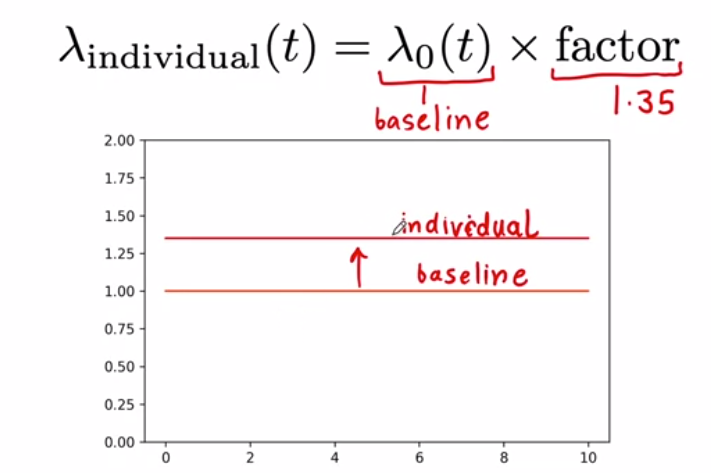

## Relative Risk

$\lambda(t)= \lambda_0(t) exp[0.08 *\text{is smoker} +0.01*age]$
- **is smoker** and **age** are variable
- 0.8, 00.1  are weights
- exp always $\geq 0$


And so, this is very similar to a linear model, where we have variables and those are multiplied by weights and then they are summed up together. The one difference here is, we're then taking the exponent of that.

And it's not very important to understand why we're taking the exponent of that, except that this helps make sure the output is always greater than or equal to zero, and we can then multiply that by the baseline hazard.

And we can use this model of a hazard to determine what are the relative risks of patients. For example, if we had two patients, patient one and patient two, and patient one had the following characteristics-- they were 50 years old and they smoked-- and patient two was 30 and they did not smoke.

Then, can we compare the relative risk of patient one, which is represented by the hazard, with the relative risk of patient two?

And so, we're not going to show the slide.

And so, let's try to compute what that risk would be, given this model. So we have the hazard for patient one, be the baseline hazard, or lambda not, of t times exp of 0.08, which is the weight associated with being a smoker.

Now we know this patient is a smoker, so we have a one indicating that this patient smokes, plus 0.01 times the age of this patient, which is 50.

We're going to keep the lambda not, and this is going to be exp of 0.08 plus 0.5, so this is 0.58. And this comes out to lambda not of t times the factor of 1.79.

And so this is what we're going to keep as the risks for our patient one. So remember this is the baseline hazard times a factor which has come out to 1.79. And we can do the same for patient two.

So the hazard for patient two is going to be the baseline hazard times the exp of 0.08.

Now this patient is not a smoker, so we'll have here a zero, and then we'll have plus 0.01 times their age, which is 30.

And this simplifies down to lambda not of t times exp of 0.3.

And so this is lambda not of t multiplied by a factor of 1.35. So there we have computed the risks for patient one and patient two.



What are the realtive risks of the patients?

Two patients:
- $\lambda_1(t)$ - 50y and smoker
- $\lambda_2(t)$ - 30y and Non-smoker

- 1 - smoker; 0- non smoker

$\lambda_1(t) = \lambda_0(t) exp[0.08*1+0.01*50]= \lambda_0(t)exp[0.58]= \lambda_1(t)* 1.79$

$\lambda_2(t) = \lambda_0(t) exp[0.08*0+0.01*30]= \lambda_0(t)exp[0.3] =\lambda_1(t)* 1.35$

## Ranking Patients by Risk

$\lambda_3(t) = \lambda_0(t) exp[0.08*0+0.01*50]= \lambda_3(t)exp[0.5] =\lambda_3(t)* 1.65$

- pt 3: 50 y Non smoker

So now that we have the hazard for both patient one and patient two, we can compare the two.

Note that for both of them, they have their representations in terms of the baseline hazard.

So this is saying, the hazard for patient one is the baseline hazard times 1.79 and here the baseline hazard times 1.35.

Now we know that the hazard is always greater than or equal to zero, which means this is always a positive number and this is always a positive number.

Because the factor on patient one is higher, this means that patient one always has at least as much risk as patient two, if not higher at every time point.

And so we can now compute the hazard for some new patient three. So for this patient, we can compute their risk as lambda not of t times exp of 0.08 times whether they're a smoker, which is a no here, plus 0.01 times age, and their age is 50, which is going to come out to lambda not t times exp of 0.5, which is going to come out to our baseline times a factor of 1.65.

So now that we've computed the hazard for all three patients, we can actually compare the risk between the patients. So here we see that the factor associated with the 50-year-old smoker is high, followed by the 50-year-old non-smoker, followed by the 30-year-old non-smoker. So we can create a rank that says patient one has a higher risk than patient two, who has a higher risk than patient three.

## Individuals vs Baeline Hazard
$\lambda_2(t) = \lambda_0(t) exp[0.08*\text{is smoker}+0.01*age]= \lambda_0(t)exp[0.5] =\lambda_1(t)* 1.65$
$\lambda_2(t) = \lambda_0(t) exp[0.08*0+0.01*0]= \lambda_0(t)exp[0]$

$\lambda(t)\lambda_0(t)*1$

So we saw the proportional hazards model, where we have the hazard be the baseline hazard times some factor that is determined by the patient covariates, and here's one thing to note is, let's see what happens when all our covariates, all our variables, are equal to zero. So we have this expression evaluate to exp of 0.08, times 0, plus 0.01, times 0, which is going to be exp of 0, which is 1. And so, the hazard for a patient is the same as the baseline hazard, if all of the variables are equal to zero.

Now of course, we won't have any patient whose age is zero and is a nonsmoker, usually our age will be larger than zero, but this tells us what the baseline hazard would look like when we have a factor of one that's coming from the patient covariates.

And the cool thing about this model is that the baseline hazard doesn't have to be specified, so it can take on any shape.

So for example, here we have two graphs showing two different baseline hazards, and a patient who has the baseline hazard times a risk factor of 1.35. And so, on the left we have a constant baseline hazard, and we can see the patient in red who is at every time point, 1.35 times that.

You can see on the right, where we have a bathtub curve hazard, how the baseline hazard sits below the patient hazard, which is 1.35 times the risk at every time point.


So we saw the proportional hazards model, where we have the hazard be the baseline hazard times some factor that is determined by the patient covariates, and here's one thing to note is, let's see what happens when all our covariates, all our variables, are equal to zero.

So we have this expression evaluate to exp of 0.08, times 0, plus 0.01, times 0, which is going to be exp of 0, which is 1. And so, the hazard for a patient is the same as the baseline hazard, if all of the variables are equal to zero. Now of course, we won't have any patient whose age is zero and is a nonsmoker, usually our age will be larger than zero, but this tells us what the baseline hazard would look like when we have a factor of one that's coming from the patient covariates. And the cool thing about this model is that the baseline hazard doesn't have to be specified, so it can take on any shape. So for example, here we have two graphs showing two different baseline hazards, and a patient who has the baseline hazard times a risk factor of 1.35. And so, on the left we have a constant baseline hazard, and we can see the patient in red who is at every time point, 1.35 times that. You can see on the right, where we have a bathtub curve hazard, how the baseline hazard sits below the patient hazard, which is 1.35 times the risk at every time point. (Required) English​Help Us Translate : Added to Selection. Press [CTRL + S] to save as a note
(Required)
en
​


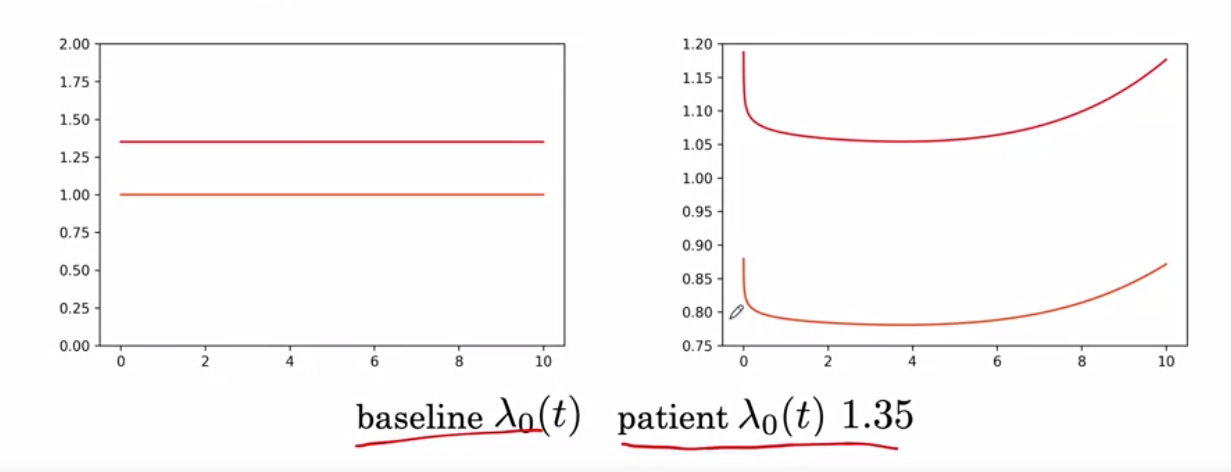

## Ratio: Smoke vs Non-Smoker

$\lambda_2(t) = \lambda_0(t) exp[0.08*\text{is smoker}+0.01*age]= $

$\lambda_{smoker}(t)    = \lambda_0(t)exp[0.08*1 + 0.01*age]$
$\lambda_{non-smoker}(t)= \lambda_0(t)exp[0.08*0 + 0.01*age]$

$\frac{\lambda_{smoker}(t)}{\lambda_{non-smoker}(t)}= \frac{\lambda_0(t)exp[0.08 + 0.01*age]}{\lambda_0(t)exp[0.01*age]} = exp[0.08]=1.08$

So, let's say we want to compare a smoker to a non-smoker. First, let's compute the hazard for a smoker. So we have lambda for a smoker of t is the baseline hazard, lambda not, times exp of 0.08, times is smoker will be 1, plus 0.01. And let's not specify the age. Let's see what happens if we just leave the age unspecified. And then we'll have our lambda of a non-smoker. Define for all time points just equal to lambda not of t, times exp of 0.08, times now, this is going to be a 0, plus 0.01, times-- let's leave the age unspecified again. And now, let's look at how much riskier a smoker is compared to a non-smoker, by saying: what is the ratio of their risk? So I divide the lambda of the smoker by the lambda of the non-smoker. And so, we have here lambda not of t on both the numerator and the denominator. And that's important because these are going to cancel out, times exp of 0.08, plus 0.01, times age, and exp of 0.01, times age. What we're going to do with this term right here is we're going to express it as the product of two exponents, so that way we'll simplify it. Let's come back to this and write it slightly differently as 2 exp right here. And this is because the addition in the exponent term is going to be the product of exponents here. And now, we can see, we can also cancel off this term. And so, this is coming out to simply the exponent of 0.08 which is going to be 1.08. And so, here we've found the ratio of the risk of a smoker to a non-smoker, without making any assumptions about their age because the age terms cancel off; so does the baseline terms. So we don't even have to specify the baseline.

### Effect of Age on Hazard

How much more risky is being 51 compared to 50?

$\lambda_{51}(t)    = \lambda_0(t)exp[0.08*\text{is smoker} + 0.01*51]$

$\lambda_{50}(t)= \lambda_0(t)exp[0.08*\text{smoker} + 0.01*50]$

$\frac{\lambda_{51}(t)}{\lambda_{50}(t)}= \frac{\lambda_0(t)exp[0.08*\text{is smoker}] + exp[0.01*50]}{\lambda_0(t)exp[0.08*smoker]+ exp[ 0.01*50]} = exp[0.01*51- 0.01*50]=exp(0.01)= 1.01$

And, this is going to come out to simply 0.01, and exp of 0.01 is 1.01. So if we take the ratio of the risk of a 51-year-old to a 50-year-old, we have a risk ratio of 1.01.

### Risk Factor Increase Per Unit Increase in a Variance

$\lambda(t)= \lambda_0(t)exp[0.08*\text{is smoker} + 0.01*age]$

$\lambda_{smoker}(t)= 1.08 * \lambda_{\text{non smoker}}(t)$

$\lambda_{51}(t) = 1.01* \lambda_{50}(t)$

|Variable     |Weight       |  exp[Weight]|
|-------------|-------------|-------------|
|is smoker    | 0.08        |1.08         |
|age          |0.01         | 1.01        |

- exp(weight) - risk factor increase for unit increase in variable

0-> 1
50->51
40->41





### Risk Factor

$\lambda_2(t) = \lambda_0(t) exp[0.08*\text{is smoker}+0.01*age]$

$\lambda_2(t) = \lambda_0(t) exp[B_1.X_1+B_2.X_2]$

$\lambda(t)= \lambda_0(t) exp[B_1X_1+ B_2X_2+ ...+ B_nX_n]$

$\lambda_0 (t) exp(\sum_{i=1}^n B_i X_i)$

$X_1 $ $B_i $  $exp(B_i)$ -> factor risk increse when we have $X_i-> X_i+1$

-  $exp(B_i) > 1$ factor risk increase
-  $exp(B_i) < 1$  factor risk decrese


What increase risk?

2-> 3
50-> 51

|Variable|Weight|exp[Weight]||
|--------|------|-----------|-------|
|Age     |0.14  |1.14       |$\lambda_{51}(t)= \lambda_{50}(t)* 1.14$ |
|HDL     |-0.7  |0.93       |
|is smoker|0.1  |1.09       |
|Treated |-0.19 |0.82       |

0.08 - 1.08
is smoker 0-> 1
0.01 -> 1.01

n-> n+1

We've seen an example of the Cox Proportional Hazards Model, where we looked at patient variables-- like whether they're a smoker and what their age is-- and we multiply each of these variables by a weight. So we can come up with a more general form of this expression where we can call these betas. So this is beta 1 (B1) and this is beta 2 (B2), and we can call these Xs: so there's X1 and X2. Now of course, a patient might have more than two variables. And so the more general form of this expression is lambda t, is lambda not of t, times exp of beta 1, X1, plus beta 2, X2, so on and so forth. And we can simplify that to say it's the sum over i of Bi, Xi, and of course we have our lambda not of t term. So let's continue from there. So now, we've also seen factor increases in the risk by a unit increase in the variables. So we saw that if we have a variable Xi, then if we look at the weight associated with it, Bi, and we take the exponent of that weight, then that represents the factor risk increase
Play video starting at :1:47 and follow transcript1:47
when we have Xi become Xi plus 1. So, it tells us what the increase is in the factor risk when we have a unit increase in our variable. And we saw two examples of this with age and with smoker, where increasing smoker from 0 to 1 increased the risks by a factor of 1.08, and increasing the age from any age n to n plus 1, increased the factor risks by 1.01. And so, one thing worth noticing here is that when our exponent of Bi is greater than 1, that means the risk factor increases. But when our exponent of Bi is smaller than 1, that means our factor risk decreases. And so, if we have this going on, it means our variable Xi is actually reducing risk. So, let's look at that with an example. So, here we have an example where we have four patient variables: age, their HDL cholesterol, and don't worry too much about what this means, whether they had treatment, and whether they are a smoker. And so we have our Cox Proportional Hazards Model with the following weight attached to these variables. Now, we can take the exponent of those weights to get the factor risk increase associated with that variable. So we can see that increasing age from, let's say 50 to 51, or whatever unit increase this can be, so this can be increasing age from 2 to 3, would increase the risk by a factor of 1.14. And just to put that down, if someone is 51, and we looked at their risk and in time t, it would be lambda 50, at time t, times the factor of 1.14. And now, we can see that for HDL we have a negative weight, and when we take the exponent of that, the result is smaller than 1. So, this is actually decreasing risk. For treatment, we see the same thing where our weight is negative, and so our exp of that weight is going to be smaller than one. Therefore, having treatment or having a high HDL is actually reducing the risk for that patient. Finally, we have a smoker, which like we've seen before, has a positive weight associated with it, so it's increasing the risk by this factor amount.

# LAB" Hazard Function:

Let's say we fit the hazard function
$$
\lambda(t, x) = \lambda_0(t)e^{\theta^T X_i}
$$

So that we have the coefficients $\theta$ for the features in $X_i$

If you have a new patient, let's predict their hazard $\lambda(t,x)$

In [8]:
lambda_0 = 1
coef = np.array([0.5,2.])
coef

array([0.5, 2. ])

In [9]:
X = pd.DataFrame({'age': [20,30,40],
                  'cholesterol': [180,220,170]
                 })
X

,age,cholesterol
0,20,180
1,30,220
2,40,170


- First, let's multiply the coefficients to the features.
- Check the shapes of the coefficients and the features to decide which one to transpose

In [10]:
coef.shape

(2,)

In [11]:
X.shape

(3, 2)

It looks like the coefficient is a 1D array, so transposing it won't do anything.  
- We can transpose the X so that we're multiplying a (2,) array by a (2,3) dataframe.

So the formula looks more like this (transpose $X_i$ instead of $\theta$
$$
\lambda(t, x) = \lambda_0(t)e^{\theta X_i^T}
$$

- Let's multiply $\theta X_i^T$

In [12]:
np.dot(coef,X.T)

array([370., 455., 360.])

Calculate the hazard for the three patients (there are 3 rows in X)

In [13]:
lambdas = lambda_0 * np.exp(np.dot(coef,X.T))
patients_df = X.copy()
patients_df['hazards'] = lambdas
patients_df

,age,cholesterol,hazards
0,20,180,4.886054e+160
1,30,220,4.017809e+197
2,40,170,2.218265e+156


# Non-linear Risk Models with Survival Trees

## Intro

In this lesson, you'll learn about survival trees. You'll see how survival trees can take patient variables into account to compare the risks of different patients. You'll see that survival trees are like binary decision trees that you've already seen before, and can allow you to build models that capture nonlinear relationships in patient data. In this lesson, we'll chat about survival trees. So, previously we've looked at survival models where we were able to come up with hazard functions, that were not just for all of the population, but were actually individualized such that one patient got one hazard function, another patient got another hazard function. Now, one of the key things about these hazard functions that we saw was that they were proportional to each other, in terms of risk, that we could represent one hazard as a factor that was multiplying another hazard.
Play video starting at ::57 and follow transcript0:57
And we can see this when we see the formula where we have the hazard for some patient is the baseline hazard times a factor, which is determined by their variables. We saw here the variables of age and whether they were a smoker being multiplied by the weight associated with those variables. Let's look at this expression a little more carefully. So, we have the hazard be the baseline hazard times this factor that's determined by the patients' variables. And let's look at what this is doing: this is saying that as age increases, the risk is increasing as well. Because remember, this is a positive term, and the exponent of a positive term is going to be greater than one. But let's say we had a case in which it was riskier to be really young than it was to be middle-aged. And then, it was riskier to be old than middle-aged. And we can see that we won't be able to capture this relationship with a linear function of age because a linear function of age can only model risk going up or going down. You cannot model it coming down and then going up. So, that's one of the disadvantages with having a linear function and thus the Cox Proportional Hazards Model. Another disadvantage of the Cox Proportional Hazards Model is that the hazard function for two patients is always proportional to each other, which means we make the assumption that the shape of the risks for similar patients looks the same. However, it's possible that patients might have very different risk curves over time. For instance, let's say we were looking at patients who receive a treatment like chemotherapy. Now, for chemotherapy, let's make the assumption that we can have a high dose of chemotherapy or a low dose of chemotherapy. And if we have a high dose of chemotherapy, then we can expect that the risk immediately after treatment is very high, but the long-term risk is lower. While with a lower dose at the start, the immediate harm, the immediate risk is lower, but then the long-term risk is higher. And so, this is not something we'd be able to represent with the Cox Proportional Hazards Model. Because in a Cox Proportional Hazards Model, these two curves should always have the same risk factor difference. While here we can clearly see that they're crossing, so the risk factor difference is not constant. In fact, it's switching as time goes on. So, our goal to be able to get around this should be that if we have a population consisting of patients, then we should come up with hazard functions that look different for different types of people within that population. And when we talk about hazard functions, remember that the hazard function can be used to get a cumulative hazard function, which can be used to get a survival function and vice versa. So, we have this goal in mind that we want to hit. And for the purposes of this video, we'll look at the cumulative hazard function as one of the things that we want to model.


## Survival Trees

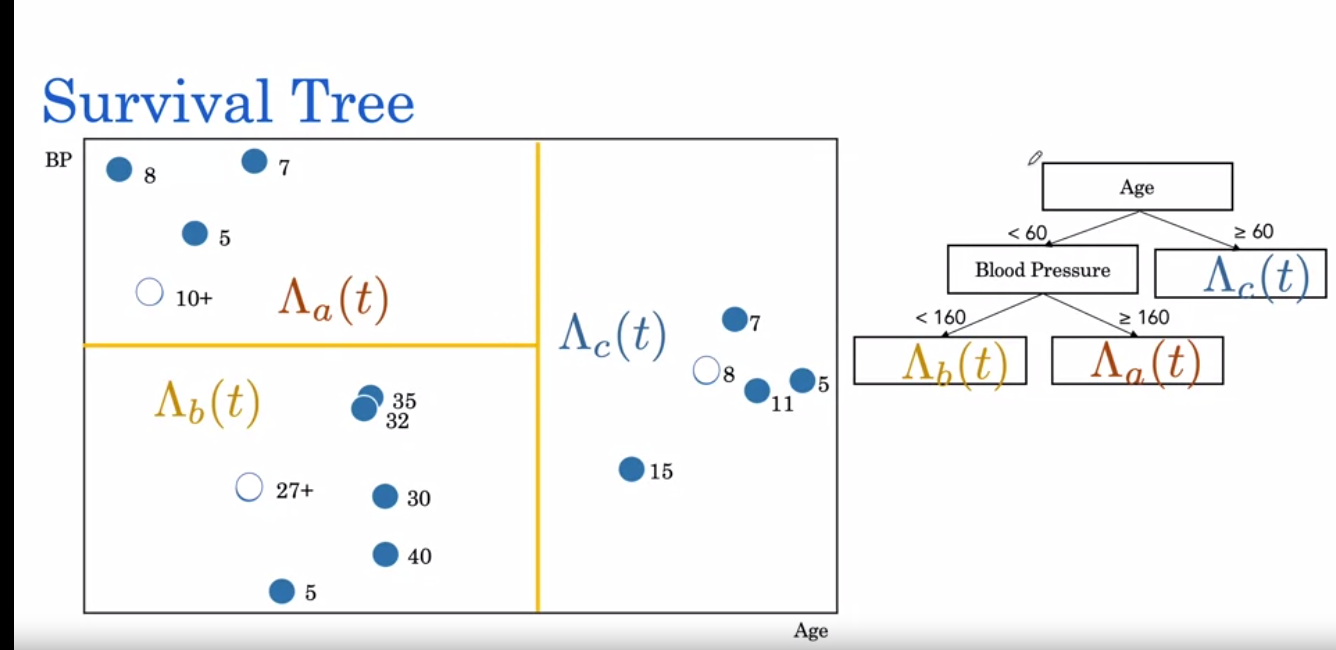


So, let's see exactly how this can happen with an example. So, let's say we're looking at a population of patients, where we're looking at the variables blood pressure on the y-axis, and age on the x-axis. And so, we get data where we can see three groups distinctly popping out: we have a group of patients who have a high age; we have a group of patients who has high blood pressure and are young; and we have a group of patients who has low blood pressure and low age. And notice that each of these points, which represents a patient, is annotated also with their survival time. And if they're a censored observation, then we have a white point, if they are an event at the given time, then we have a blue color to represent that. And so, let's say we wanted to split up this population into patients that look similar to each other, such that they had a similar survival time. So, notice that everyone here seems to have a survival time that's fairly low compared to cure, where the survival time seems to be higher. We've got numbers in the 30s, 40s, and then again here we've got survival times that are small. And so, we can try to come up with a manual classification which separates out these patients, and these patients, and these patients. And we can say-- first rule that we're going to make is that if the age is beyond a certain threshold, let's say this one, then we will separate out the two groups. And then we have these two groups here, so we're going to say, if blood pressure then is beyond a certain threshold, then we're going to have a different group. Let's say for this group we're going to estimate the cumulative hazard, and let's call this group a at every time t. Let's call this group b, so we'll say here we will estimate the cumulative hazard for our group b, and here we will estimate the cumulative hazard for group c. And now, notice that this might look very similar to you, we're going to skip the slide, to a decision tree because that's exactly what it is. And this decision tree that we came up with can be represented in this tree structure, which says is your age greater than 60. We have not labeled the axis for simplicity, but let's say this was 60, then if the age is greater than/ equal to 60, you're in group c, and we're going to build a estimate of the cumulative hazard. If the age is smaller than 60, let's look at the blood pressure. And if the blood pressure is smaller than 160, that's where we have our line, then the patient is a part of group b, and we will use the cumulative hazard for group b. And if their blood pressure is greater than/ equal to 160, then we'll use the cumulative hazard for group a. And we've seen decision trees before in an earlier module. Let's just look at how they looked. So remember that earlier, we had a decision tree where we were trying to classify whether someone's added risk of heart disease or mortality. And we saw that we could build these lines that could classify patients, such that they in the appropriate risk category where we had low risk, high risk, and high risk categories that we came up with as part of our decision tree. There are a couple of key differences here. The first one of them is that we're now dealing with the time to event model. So in our time to event model, we're not just saying whether something is low risk or high risk, we're actually saying what the risk is at every point in time. And remember where we can represent the risk at every point in time with lambda of t, or we can represent it with the cumulative hazard, or with the survival function, because remember they're interchangeable, in this particular case, we focus on cumulative hazard. But that's one difference, and the second difference is that we're now dealing with survival data. So these patients are not just colored like they were before with red or blue, which represented whether they died or lived in ten years, but with the survival time. So we have survival time of seven, and let's say the units was years, survival time of five years. We have a censoring time of ten plus years. This is another key difference with survival data where we have censored observations. And so, when we have a new patient that comes in, this one with age 52 and blood pressure of 132, we can determine which hazard to use to estimate their risk by seeing where they would fall. So age is smaller than 60, and then the blood pressure is smaller than 160, so we know that they would fall in this group, which is group b. And then we would estimate their cumulative hazard at every point in time t, with our cumulative hazard estimate for group b.
(Required)
en
​


# Nelson Aalen Estimator

Cumulative Hazard Estimation:

$H(t) = \sum_{i=1}^t \frac{d_i}{n_i}$
- $d_i$- num died at tiem i
- $n_i$ - num surviveved to time i
- t=33
- $H(33)= \sum_{1=0}^33 \frac{d_i}{n_i}= \frac{d_5}{n_5} + \frac{d_30}{n_30} +\frac{d_32}{n_32} = \frac{1}{6} +\frac{1}{4} + \frac{1}{3} =0.75$

|i|$T_i$|
|---|---|
|1  | 35|
|2  |32 |
|3  |27+|
|4  |30 |
|5  |40 |
|6  | 5 |



So, let's talk about how we can actually estimate the cumulative hazard for this group, once we've gone to the group. So, we can represent each of these data points in the form of a survival table, which we have seen before, where we have a set of patients. Here we have six patients, and, for each of them, we write the outcome, which is the event times, or the censoring times. Here we can see that we have one censored observation, which we write as 27+. And we have five non-censored observations for which we write the event types. And now once we have a table of this form, we have seen how we can use survival estimation with the Kaplan-Meier method to come up with a survival function that uses this data. But the Kaplan-Meier estimator is not the only estimator we can use. One other estimator, called the Nelson-Aalen estimator, allows us to estimate the cumulative hazard of the population instead. And we won't go into the derivation of this. We'll go through an example of generating a cumulative hazard estimate for a population. So here we have once again the formula for the cumulative hazard. And we have the table where we have the data that we will use to estimate the cumulative hazard. So let's look at this expression in a little more detail. We have the sum from i equals 0 to t of di over ni. And the definitions of di and ni are the same as before. And as a reminder, di is the num that died at time i. And we have ni, which is the num that survived to time i. And so, those are the quantities that we have seen previously when we looked at the hazard. And remember the cumulative hazard is the sum of the hazards over time. So let's say we wanted to look at the cumulative hazard for some time. Let's pick that time to be 33, just for the purposes of this example. And let's try to estimate the cumulative hazard at 33 using this Nelson-Aalen estimator. And so we have the sum from i equals 0 to 33 of di over ni. Now, this is looking at the number of patients who have died at every point in time. Now when we look at our data, let's look at where the deaths occur. And let's specifically look at where the deaths occur between 0 and 33. So the first patient has a death occurring after 33, so we won't look at that. Patient 2 has death before 33, so we'll have to look at that. Now patient 3 is censored before 33, but that is not a death or event. Patient 4 has an event before 33. Patient 5 does not have an event before 33. And patient 6 has an event before 33. So there are three time points that we are going to care about, which are going to have a numerator that is nonzero. And so, let's look at this sum. So, now we have the sum from 0 to 33 of di over ni. But we know that di is only nonzero for these three event times. So we can represent the sum as, first, d5 over n5, because our first event is at 5. Our next event is going to be at 30, so it's d30 over n30. And our next event after that is at 32, so d32 over n32. And let's compute each of these quantities. So d5, remember, is the number that died at time 5, which is going to be 1. And n5 is the number that survived to time 5, and we can see all six patients survive to time 5. Then we have d of 30 so we look at how many patients survive to 30. So we have patient 1 who survived to 30, patient 2 survived to 30, patient 3, who we don't know whether they survived to 30, so they won't be in our denominator. And of course patient 4 survived to 30, even though they died at 30, we still include them because survival 2 is defined as up to that point in time. And finally, patient 5 survives to 30. So, we have four in total that survive to 30 and one who has an event. Finally, we have d32, which is going to be 1 again, and n32, which is the number of patients that have survived to 32. And here we have patient 1, patient 2, and patient 5, so we have three in our denominator. And so we have these three quantities which we can sum to get a total sum of 0.75. 0.75 is our estimate of the cumulative hazard at time equals 33. Of course, our time could be any quantity between 0 and infinity, and we can get our cumulative hazard estimate for any of that.

## Comparing Risks of Patients



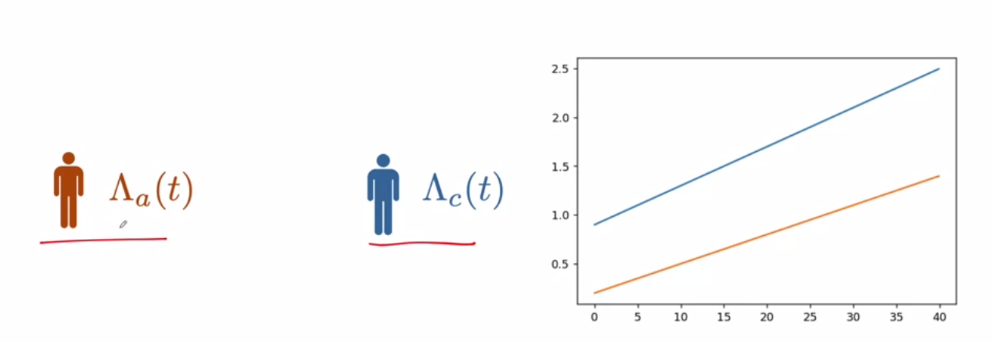

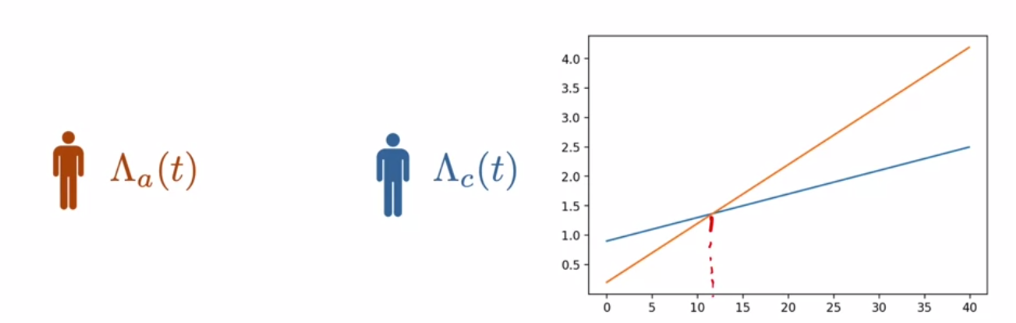

 But what do we do when we have cumulative hazards that are crossing, such that for time points below some point, the blue patient has the higher cumulative hazard, while the orange patient has a higher cumulative hazard beyond that time point? And to be able to tell which one of them is more at risk, we have to know what time we care about comparing the cumulative hazard of the two.

### Mortality Score:

- $\Lambda_a(20)= 2.2$   $\Lambda_c(20) = 1.7$
- $\Lambda_a(25)= 2.7$   $\Lambda_c(25) = 1.9$
- $\Lambda_a(30)= 3.2$   $\Lambda_c(30) = 2.1$
- $\Lambda_a(33)= 3.5$   $\Lambda_c(33) = 2.2$
- $M_a=11.6$             $M_c=7.9$



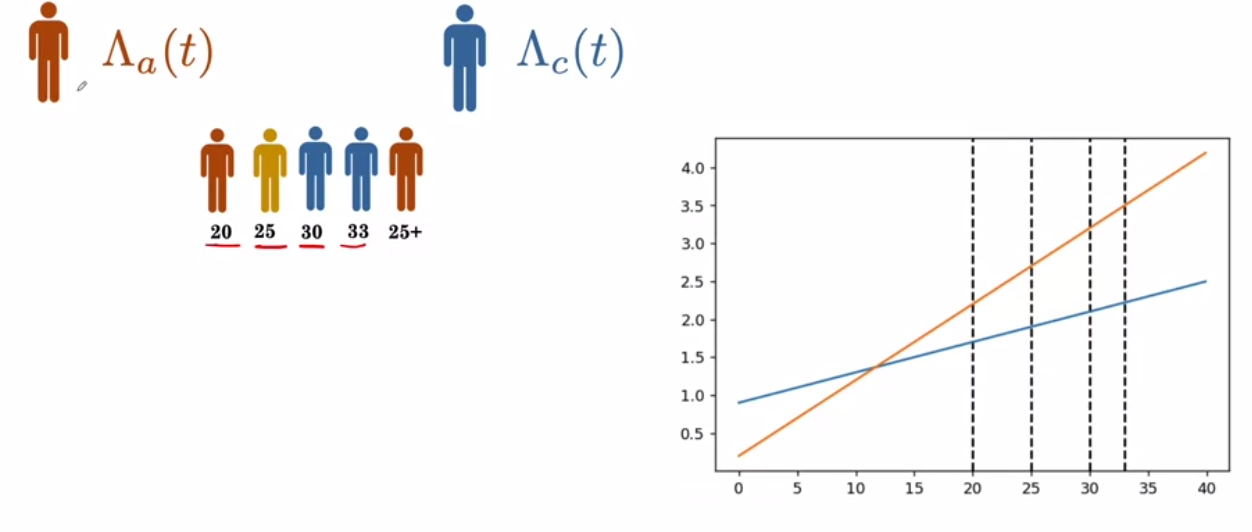

# Evaluate SUrvival Models

How good is  prognosticv models?

### Evaluate of survival model

- Previously
||||
|---------------------|---|---|
|Died withib 10 Years?|Yes| No|
|Risk score           |0.8|0.6|

$$C-index = \frac{\text{# concordant pairs + 0.5* # risk ties}}{\text{# permissible pairs}}$$

- Survival Models

| | | |
|----------|----|----|
|T         | 30 |120+|
|Risk score|?   |  ? |

Time and censoring

- Concordant

| | | |
|----------|----|----|
|T         | 20 |40  |
|Risk score|0.94|0.65|

Patient with worse outcome should have highed risk score

-Time to event is the same

| | | |
|----------|----|----|
|T         | 40 |40  |
|Risk score|0.6|0.6|


- Not concordant

| | | |
|----------|----|----|
|T         | 20 |40  |
|Risk score|0.40|0.65|

- Risk Ties

| | | |
|----------|----|----|
|T         | 20 |40  |
|Risk score|0.65|0.65|

In this lesson, you'll learn about the Harrell's concordance index to evaluate the performance of survival models. You've already worked with and calculated the regular concordance index before. You'll learn how this calculation can be modified, when you are working with survival data. This final tool will allow you to evaluate the survival models you've now learned about. In this lesson, we'll chat about the evaluation of survival models with the Harrell's C-index. We've already seen the setup of evaluating a prognostic model. We asked how good a prognostic model was earlier, when we were looking at a setup where we had a risk of death within 10 years, where we were looking at cardiovascular disease risk prediction in 10 years. And there, we had this outcome of yes or no for death within 10 years, and we had a model output a risk score. And we saw the C-index, which looked at pairwise comparisons and looked at how many of the pairs were concordant, how many of them were tied and divided, by the total number of permissible pairs, in those pairwise comparisons. Survival models have two main differences to the setups we've seen earlier. The first difference is that the ground truth, the thing we're caring about modeling, is the time to the event, and we'll call that a capital T, where for patients we have a time to an event, like 30 months, in this example. And the second key difference that we have with survival models in our data is that we have censored observations, and we need to think about in our evaluations how we can handle these censored observations as well. So first, let's look at the idea of concordance again. Concordance was the idea that the patient with the worst outcome should have a higher risk score. And now, we can think about in time to event problems, what does worse outcome mean? And we can see that a worse outcome would be if a patient had an event earlier. So for example, if this patient had an event at time 20 months, and this patient had an event at time 40 months, the worst outcome was for the patient who lived a shorter amount of time, and so for this patient we should have a higher risk score. So this would be a concordant pair because it does follow this rule. But let's look at what happens when our time to event is the same. Now when our time to event is the same, we'd want an ideal risk score to say that the risks for both of them is the same. So this would be another case which we would now call concordant. Let's say we had two time to events that were different, but the worse outcome was for one who got the lower risk score, in this case this patient, that's a problem. So this is a not concordant pair. Here's an example of a risk type where we have two different time to events, but we have the same risk score. And if we have the same risk score for two patients who had a different time to an event, this would be an example of a risk tie for those patients. This is also an example of a risk tie where we have two patients with the same time to an event where we're saying that the risk score for one of them is smaller than for the other. And here we don't want to fully reward the risks model because the time to events were the same. So ideally, we should have had the same risk score, but it's not entirely wrong either. So we'll call this a risk tie.

## Permissible and Non-Permissible Pairs

- Permissible Pairs

| | | |
|----------|----|----|
|Time to Event| 20 |40  |
|Risk score|0.40|0.65|

| |A |B |
|----------|----|----|
|Time to Event| 20 |40  |
|Risk score   |0.94|0.65|


|----x-event

|---------0- may be event

- Non permissible Pairs

| |A |B |
|----------|----|----|
|Time to Event| 20+ |40  |
|Risk score   |0.94|0.65|

|----x-event

|---------0- may be event

| |A |B |
|----------|----|----|
|Time to Event| 20+ |40+  |
|Risk score   |0.94|0.65|

| |A |B |
|----------|----|----|
|Time to Event| 40+ |40+  |
|Risk score   |0.94|0.65|

Recall the permissible pairs, where pairs where earlier we had patients with different outcomes, one get a zero, one get a one and we're going to extend this idea to survival data now. So, here's an example of a permissible pair. So, for this example, we have two patients with the same time to an event. Now, earlier, remember when both patients were one or one in the binary setup or zero and zero, we said that was not a permissible pair. But this does not hold true when extended to survival data. If we have two timed events with the same time, we still consider it a permissible pair when we're looking at survival data. Let's look at the following example. So, now we have our first censored observation, and this is 40 plus. So we know that until 40, this patient did not have an event, but they had one after. And so, now can we really make a comparison between who had the worst outcome here? Turns out we can, because let's think about what's happening here. We have patient A and patient B, and let's call this Patient A and let's call this Patient B. Let's say we were drawing a timeline of what was happening to the patients. And let's say this extended up to 20, then this extended up to 40, and then it was censored. I'm going to denote censored by an empty circle over here. And notice that Patient A clearly had the worst outcome because B outlived A. Even though we didn't see when they had an event, if they had an event at all, we know that their outcome was certainly better. I'll compare that to the following, now we have once again Patient A and Patient B, but Patient A is the one who's censored with a censoring time of 20 plus. So drawing the same again, we have A censoring here and we have an event at 40. So now, for A we don't know whether they lived to beyond 40 or before 40. So, we're not able to make this comparison. Here we have two patients who both have censored times. And again, we're not able to make this comparison of who has the worst outcome because that could be either one of the patients. It doesn't matter, even if they have the same censoring time, we're still not able to make this comparison.

### Possible Permissible Pairs

So, let's look at a picture of the permissible pair possibilities. So, here is a pair and both of these patients in the pair have an event and the length of the line is the event time. So, we can see here we're able to make comparison if it was the worst outcome. Here we're able to make the comparison of this patient has the worst outcome. Here we're able to say that this patient must have the worst outcome because this patient survive beyond that time. They didn't have an event up to or until that point. And finally, if a pair of patients has an event at the same time, we in our definition call it a permissible pair because we're evaluating whether we have a model, give them the same risk score. On the other side, we have non-permissible pairs and here we can see if one of the observations of one of the patients was censored before the other have the event, then we're not able to make that comparison. If both had a censored time that was equivalent, we still can't make a comparison and even if they're censored times were different, we're not able to make this comparison. And so, with that in mind, we come to the Harrell's C-Index, where we have for every permissible pair that is concordant, a score of plus one and a score of 0.5 for a permissible pair that is a risk tie. And so, our formula of the C-index stays the same with a slightly different definition of what it means to be a concordant pair, what it means to be a risk tie, and what it means to be a permissible pair with survival data, but we can apply the same principle and the same formula to our new survival models.

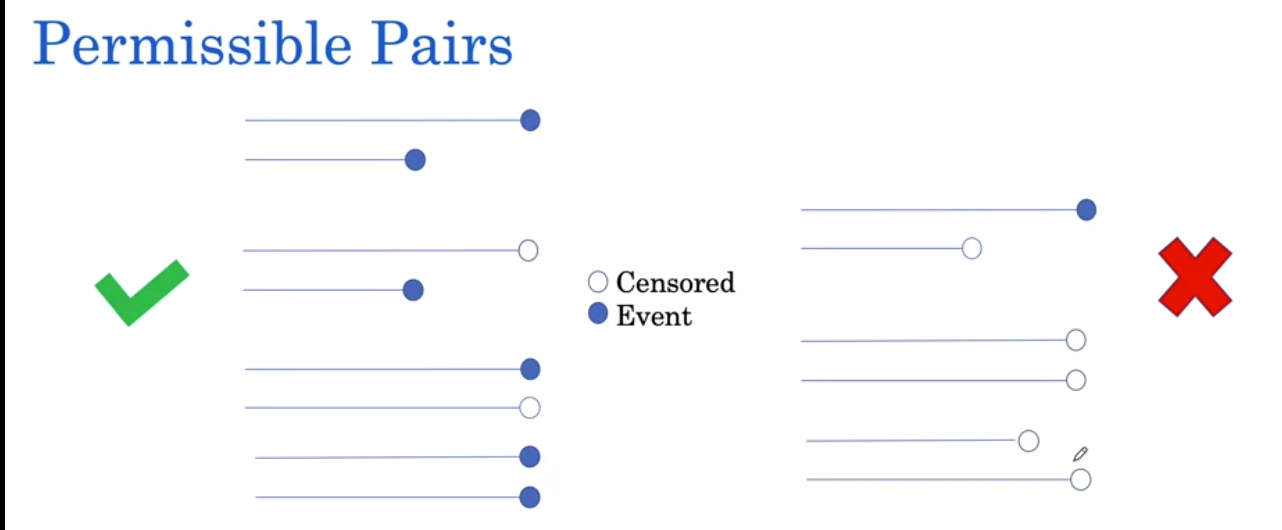

Harrell's C-index

- $+1$ for a permissible pairs that is concordant
- $+0.5$ for a permissible pairs that is a risk tie

$$C-index = \frac{\text{# concordant pairs + 0.5 x #risk ties}}{\text{# permissible pairs}}$$

### Example of Herral's C-index

|Patient|Time-T|Risk|
|-------|------|----|
|A      |15+   |0.65|
|B      |20    |1.73|
|C      |5     |0.70|
|D      |5+    |0.70|
|E      |10    |0.83|

- $0.65\lambda_0(t)$
- $M \sum \Lambda(t)$

- Permissible pairs:
- $AC, AE, BC, BE, CD, CE, $


Great. So now, let's look at an example where we have a set of patients, and let's try to compute the Harrell's C-Index for this particular risk model. Now, notice that all of these risks scores are scalars and we can ask, where did these come from? Well, if we have a Cox Proportional-Hazards Model, remember that we had come up with risks such as 0.65 times Lambda, naught of t, and that could be this number over here. But also, when we look at survival trees, for survival trees, we look at the M, where we summed over the cumulative hazards for a population. And so, when we did that sum, that led to a scalar as well. And so, this could come from either the mortality for a survival tree or from this scale factor for the Cox Proportional Hazards Model. But we have this risk model which outputs these risk scores. Let's look at how we can evaluate how good of a model this is on this data. Okay. So, our first step is going to be to look at the permissible pairs in this population. So, let's first try to find which of these pairs are permissible. So, let's first look at the pair A,B and determine whether that's permissible. So, notice now that we have the censoring occur before the event time. So, this is a case where we're not able to compare the outcomes. So, that's not a permissible pair. We'll see A, C now. For A, C, we can see the event time here is happening before, so this is going to be a permissible pair. Then we can look at A, D and see that both of these times are censored so we won't be able to make this comparison. We can look at A, E and determine, "Okay, we have an event occur before an observation is censored." So, this is also a valid permissible pair. Let's look at B now. So, our first comparison is going to be B and C. Both of these are events, so we can definitely compare them. Let's look at B and D. We can see that the censoring is happening before the event so this is not going to be a permissible pair. Let's look at B and E. So for B and E, both of those are events, so that's certainly a permissible pair. Now, let's look at C. So C and D is the first one. So, notice here that C and D is a case where we have one event, but we know one of them was censored at the time. Now, when we know one of them was censored at the time, we know that they didn't have an event up to or at that time so we know that the worst outcome was for C. So, this is a permissible pair. Notice that so far I've only looked at the T column. I'm not looking at the risk column at all because we don't need the risk column when we're determining whether a pair is permissible. Let's look at C and E and notice that that's also a permissible pair because both are events. And finally, let's look at D and E and realize that for D, the censoring is happening before the event time, so we won't be able to compare the two. And so, we have six permissible pairs.

Concordant Pairs: $AC, AE, CD$

Risk Ties: None

$C-index = \frac{3+ 0.5*0}{6}= 0.5$


Now, let's look at our concordant pairs. Now, notice when we're looking at concordant pairs, we only have to look at the pairs that were permissible. Because only the permissible pairs are comparable, and so now we'll see concordance. And remember, concordance says, "Does the patient with the worst outcome have the higher risk score?" And let's try to determine whether that's the case. So for A,C, we have the risk as 0.65 and 0.7, and the worst outcome was for patient C, and so that's going to be A,C is concordant. Then we have pair A,E. And for A,E, we can see that the worst outcome was for E. And E had the higher risk score, so A,E is also going to be a concordant pair.
Play video starting at :1:2 and follow transcript1:02
Now, let's look at B,C. So for B,C, we have both of them events and a higher risk assigned to B, but B has the longer survival time, so this is not a concordant pair. Finally, let's look at B,E. In B,E, we have the high risk assigned to B but that's the longer survival time, so that is also not a concordant pair. Let's look at C,D now. C,D, we have the worst outcome for C, and C has the higher risk. So this is going to be a concordant pair. Finally, we have C, where the worst outcome is for C and the higher risk is for E. So this is not a concordant pair. Let's look at whether we have any ties. We don't have any ties because we have been through
Play video starting at :2:7 and follow transcript2:07
all of the pairs at this point. So here we're just going to write None. And so, remember our formula for the C-index is going to be the number of concordant pairs. Here, we have 3 concordant pairs + the number of risk ties. We can see we have no risk ties over here. And so, that's going to be 0.5 times 0 and our denominator is going to have the number of permissible pairs which in this case was 6. And so, we have our C-index of 3 over 6, which is equal to 0.5.

# LAB Permissible Pairs with censoring and time


In [14]:
df = pd.DataFrame({'time': [2,4,2,4,2,4,2,4],
                   'event': [1,1,1,1,0,1,1,0],
                   'risk_score': [20,40,40,20,20,40,40,20]
                  })
df

,time,event,risk_score
0,2,1,20
1,4,1,40
2,2,1,40
3,4,1,20
4,2,0,20
5,4,1,40
6,2,1,40
7,4,0,20


We made this data sample so that you can compare pairs of patients visually.

### When At Least One Patient is Not Censored
- A pair may be permissible if at least one patient is not censored.
- If both pairs of patients are censored, then they are definitely not a permissible pair.

In [15]:
pd.concat([df.iloc[0:1],df.iloc[1:2]],axis=0)

,time,event,risk_score
0,2,1,20
1,4,1,40


In [16]:
if df['event'][0] == 1 or df['event'][1] == 1:
    print(f"May be a permissible pair: 0 and 1")
else:
    print(f"Definitely not permissible pair: 0 and 1")

May be a permissible pair: 0 and 1


In [17]:
pd.concat([df.iloc[4:5],df.iloc[7:8]],axis=0)

,time,event,risk_score
4,2,0,20
7,4,0,20


In [18]:
if df['event'][4] == 1 or df['event'][7] == 1:
    print(f"May be a permissible pair: 4 and 7")
else:
    print(f"Definitely not permissible pair: 4 and 7")

Definitely not permissible pair: 4 and 7


### If Neither Patient was Censored:
- If both patients had an event (neither one was censored). This is definitely a permissible pair.

### When One Patient is Censored:
- If we know that one patient was censored and one had an event, then we can check if censored patient's time is at least as great as the uncensored patient's time.  If so, it's a permissible pair as well

In [19]:
pd.concat([df.iloc[6:7],df.iloc[7:8]],axis=0)

,time,event,risk_score
6,2,1,40
7,4,0,20


In [20]:
if df['time'][7] >= df['time'][6]:
    print(f"Permissible pair: Censored patient 7 lasted at least as long as uncensored patient 6")
else:
    print("Not a permisible pair")

Permissible pair: Censored patient 7 lasted at least as long as uncensored patient 6


In [21]:
pd.concat([df.iloc[4:5],df.iloc[5:6]],axis=0)

,time,event,risk_score
4,2,0,20
5,4,1,40


In [22]:
if df['time'][4] >= df['time'][5]:
    print(f"Permissible pair")
else:
    print("Not a permisible pair: patient 4 was censored before patient 5 had their event")

Not a permisible pair: patient 4 was censored before patient 5 had their event


In [23]:
if df['time'][4] >= df['time'][5]:
    print(f"Permissible pair")
else:
    print("Not a permisible pair: patient 4 was censored before patient 5 had their event")

Not a permisible pair: patient 4 was censored before patient 5 had their event


In [25]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 10.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=0f5ec2e91f8a299ff45619177ac17546414c7a02b6ba3664bc27eaeea7bdb29a
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [26]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lifelines import CoxPHFitter
from lifelines.utils import concordance_index as cindex
from sklearn.model_selection import train_test_split

from util import load_data

ModuleNotFoundError: ignored

In [29]:
import os

import pandas as pd

__location__ = "/content/drive/MyDrive/SoftUni/notebooks/W4A1/data/"

In [30]:
def load_data():
    df = pd.read_csv(os.path.join(__location__, 'pbc.csv'))
    df = df.drop('id', axis=1)
    df = df[df.status != 1]
    df.loc[:, 'status'] = df.status / 2.0
    df.loc[:, 'time'] = df.time / 365.0
    df.loc[:, 'trt'] = df.trt - 1
    df.loc[:, 'sex'] = df.sex.map({'f':0.0, 'm':1.0})
    df = df.dropna(axis=0)

    return df

In [31]:
df = load_data()

<ipython-input-30-79d3fe0b2bc1>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'status'] = df.status / 2.0
<ipython-input-30-79d3fe0b2bc1>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'sex'] = df.sex.map({'f':0.0, 'm':1.0})


In [32]:
print(df.shape)

# df.head() only outputs the top few rows
df.head()

(258, 19)


,time,status,trt,age,sex,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime,stage
0,1.095890,1.0,0.0,58.765229,0.0,1.0,1.0,1.0,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,12.328767,0.0,0.0,56.446270,0.0,0.0,1.0,1.0,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,2.772603,1.0,0.0,70.072553,1.0,0.0,0.0,0.0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,5.273973,1.0,0.0,54.740589,0.0,0.0,1.0,1.0,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
6,5.019178,0.0,1.0,55.534565,0.0,0.0,1.0,0.0,0.0,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0


In [33]:
i = 20
df.iloc[i, :]

time          11.175342
status         1.000000
trt            0.000000
age           44.520192
sex            1.000000
ascites        0.000000
hepato         1.000000
spiders        0.000000
edema          0.000000
bili           2.100000
chol         456.000000
albumin        4.000000
copper       124.000000
alk.phos    5719.000000
ast          221.880000
trig         230.000000
platelet      70.000000
protime        9.900000
stage          2.000000
Name: 23, dtype: float64

Now, split your dataset into train, validation and test set using 60/20/20 split.

In [34]:
np.random.seed(0)
df_dev, df_test = train_test_split(df, test_size = 0.2)
df_train, df_val = train_test_split(df_dev, test_size = 0.25)

print("Total number of patients:", df.shape[0])
print("Total number of patients in training set:", df_train.shape[0])
print("Total number of patients in validation set:", df_val.shape[0])
print("Total number of patients in test set:", df_test.shape[0])

Total number of patients: 258
Total number of patients in training set: 154
Total number of patients in validation set: 52
Total number of patients in test set: 52


Before proceeding to modeling, let's normalize the continuous covariates to make sure they're on the same scale. Again, we should normalize the test data using statistics from the train data.

In [36]:
continuous_columns = ['age', 'bili', 'chol', 'albumin', 'copper', 'alk.phos', 'ast', 'trig', 'platelet', 'protime']
mean = df_train.loc[:, continuous_columns].mean()
std = df_train.loc[:, continuous_columns].std()
df_train.loc[:, continuous_columns] = (df_train.loc[:, continuous_columns] - mean) / std
df_val.loc[:, continuous_columns] = (df_val.loc[:, continuous_columns] - mean) / std
df_test.loc[:, continuous_columns] = (df_test.loc[:, continuous_columns] - mean) / std

df_train.loc[:, continuous_columns].describe()

,age,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime
count,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02
mean,-2.826022e-16,-4.325544e-17,1.326500e-16,1.153478e-16,5.767392e-18,-5.767392e-17,1.153478e-16,5.767392e-17,2.018587e-17,5.161816e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.304107e+00,-5.735172e-01,-1.115330e+00,-3.738104e+00,-9.856552e-01,-7.882167e-01,-1.489281e+00,-1.226674e+00,-2.058899e+00,-1.735556e+00
25%,-6.535035e-01,-4.895812e-01,-5.186963e-01,-5.697976e-01,-6.470611e-01,-5.186471e-01,-8.353982e-01,-6.884514e-01,-6.399831e-01,-7.382590e-01
50%,-6.443852e-03,-3.846612e-01,-2.576693e-01,5.663556e-02,-3.140636e-01,-3.416086e-01,-2.260984e-01,-2.495932e-01,-4.100373e-02,-1.398807e-01
75%,5.724289e-01,2.977275e-02,1.798617e-01,6.890921e-01,3.435366e-01,-4.620597e-03,6.061159e-01,3.755727e-01,6.617988e-01,3.587680e-01
max,2.654276e+00,5.239050e+00,6.243146e+00,2.140730e+00,5.495204e+00,4.869263e+00,3.058176e+00,5.165751e+00,3.190823e+00,4.447687e+00


## 4. Cox Proportional Hazards

Our goal is to build a risk score using the survival data that we have. We'll begin by fitting a Cox Proportional Hazards model to your data.

Recall that the Cox Proportional Hazards model describes the hazard for an individual $i$ at time $t$ as

$$
\lambda(t, x) = \lambda_0(t)e^{\theta^T X_i}
$$

The $\lambda_0$ term is a baseline hazard and incorporates the risk over time, and the other term incorporates the risk due to the individual's covariates. After fitting the model, we can rank individuals using the person-dependent risk term $e^{\theta^T X_i}$.

Categorical variables cannot be used in a regression model as they are. In order to use them, conversion to a series of variables is required.

Since our data has a mix of categorical (`stage`) and continuous (`wblc`) variables, before we proceed further we need to do some data engineering. To tackle the issue at hand we'll be using the `Dummy Coding` technique. In order to use Cox Proportional Hazards, we will have to turn the categorical data into one hot features so that we can fit our Cox model. Luckily, Pandas has a built-in function called `get_dummies` that will make it easier for us to implement our function. It turns categorical features into multiple binary features.

In the cell below, implement the `to_one_hot(...)` function.

In [37]:
def to_one_hot(dataframe, columns):
    '''
    Convert columns in dataframe to one-hot encoding.
    Args:
        dataframe (dataframe): pandas dataframe containing covariates
        columns (list of strings): list categorical column names to one hot encode
    Returns:
        one_hot_df (dataframe): dataframe with categorical columns encoded
                            as binary variables
    '''

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

    one_hot_df = pd.get_dummies(dataframe,columns=columns,dtype=np.float64,drop_first=True)

    ### END CODE HERE ###

    return one_hot_df

Now we'll use the function you coded to transform the training, validation, and test sets.

In [38]:
# List of categorical columns
to_encode = ['edema', 'stage']

one_hot_train = to_one_hot(df_train, to_encode)
one_hot_val = to_one_hot(df_val, to_encode)
one_hot_test = to_one_hot(df_test, to_encode)

print(one_hot_val.columns.tolist())
print(f"There are {len(one_hot_val.columns)} columns")

['time', 'status', 'trt', 'age', 'sex', 'ascites', 'hepato', 'spiders', 'bili', 'chol', 'albumin', 'copper', 'alk.phos', 'ast', 'trig', 'platelet', 'protime', 'edema_0.5', 'edema_1.0', 'stage_2.0', 'stage_3.0', 'stage_4.0']
There are 22 columns


In [39]:
print(one_hot_train.shape)
one_hot_train.head()

(154, 22)


,time,status,trt,age,sex,ascites,hepato,spiders,bili,chol,...,alk.phos,ast,trig,platelet,protime,edema_0.5,edema_1.0,stage_2.0,stage_3.0,stage_4.0
279,3.868493,0.0,0.0,-0.414654,0.0,0.0,0.0,0.0,-0.300725,-0.096081,...,0.167937,0.401418,0.330031,0.219885,-1.137178,0.0,0.0,0.0,1.0,0.0
137,3.553425,1.0,0.0,0.069681,1.0,0.0,1.0,0.0,0.895363,0.406085,...,0.101665,0.472367,1.621764,-0.120868,-0.239610,0.0,0.0,0.0,1.0,0.0
249,4.846575,0.0,1.0,-0.924494,0.0,0.0,1.0,0.0,-0.510565,-0.225352,...,0.245463,1.899020,-0.580807,0.422207,0.159309,0.0,0.0,0.0,0.0,1.0
266,0.490411,1.0,0.0,1.938314,0.0,1.0,1.0,1.0,0.748475,-0.608191,...,-0.650254,-0.288898,-0.481443,-0.727833,1.356065,0.0,1.0,0.0,0.0,1.0
1,12.328767,0.0,0.0,0.563645,0.0,0.0,1.0,1.0,-0.405645,-0.210436,...,2.173526,-0.144699,-0.531125,-0.450972,-0.139881,0.0,0.0,0.0,1.0,0.0


## 5. Fitting and Interpreting a Cox Model

In [42]:
cph = CoxPHFitter()
cph.fit(one_hot_train, duration_col = 'time', event_col = 'status')

/usr/local/lib/python3.10/dist-packages/lifelines/fitters/coxph_fitter.py:1679: RuntimeWarning: overflow encountered in exp
  scores = weights * exp(dot(X, beta))
/usr/local/lib/python3.10/dist-packages/lifelines/fitters/coxph_fitter.py:1700: RuntimeWarning: invalid value encountered in add
  risk_phi_x = risk_phi_x + phi_x_i
/usr/local/lib/python3.10/dist-packages/lifelines/fitters/coxph_fitter.py:1701: RuntimeWarning: invalid value encountered in add
  risk_phi_x_x = risk_phi_x_x + phi_x_x_i
/usr/local/lib/python3.10/dist-packages/lifelines/fitters/coxph_fitter.py:1733: RuntimeWarning: invalid value encountered in multiply
  a1 = risk_phi_x_x * denom
/usr/local/lib/python3.10/dist-packages/lifelines/fitters/coxph_fitter.py:1735: RuntimeWarning: invalid value encountered in multiply
  summand = numer * denom[:, None]
/usr/local/lib/python3.10/dist-packages/lifelines/fitters/coxph_fitter.py:1740: RuntimeWarning: divide by zero encountered in log
  log_lik = log_lik + dot(x_death_sum, b

ConvergenceError: ignored

In [43]:
cph.print_summary()

AttributeError: ignored

**Question:**

- According to the model, was treatment `trt` beneficial?
- What was its associated hazard ratio?
    - Note that the hazard ratio is how much an incremental increase in the feature variable changes the hazard.

Check your answer!
You should see that the treatment (trt) was beneficial because it has a negative impact on the hazard (the coefficient is negative, and exp(coef) is less than 1).
The associated hazard ratio is ~0.8, because this is the exp(coef) of treatment.

We can compare the predicted survival curves for treatment variables. Run the next cell to plot survival curves using the `plot_covariate_groups()` function.
- The y-axis is th survival rate
- The x-axis is time

In [44]:
cph.plot_covariate_groups('trt', values=[0, 1]);

AttributeError: ignored

## 6. Hazard Ratio

Recall from the lecture videos that the Hazard Ratio between two patients was the likelihood of one patient (e.g smoker) being more at risk than the other (e.g non-smoker).
$$
\frac{\lambda_{smoker}(t)}{\lambda_{nonsmoker}(t)} = e^{\theta (X_{smoker} - X_{nonsmoker})^T}
$$

Where

$$
\lambda_{smoker}(t) = \lambda_0(t)e^{\theta X_{smoker}^T}
$$
and
$$
\lambda_{nonsmoker}(t) = \lambda_0(t)e^{\theta X_{nonsmoker}^T} \\
$$

In [45]:
def hazard_ratio(case_1, case_2, cox_params):
    '''
    Return the hazard ratio of case_1 : case_2 using
    the coefficients of the cox model.

    Args:
        case_1 (np.array): (1 x d) array of covariates
        case_2 (np.array): (1 x d) array of covariates
        model (np.array): (1 x d) array of cox model coefficients
    Returns:
        hazard_ratio (float): hazard ratio of case_1 : case_2
    '''

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

    hr = np.exp(np.dot(cox_params,(case_1 - case_2).T))

    ### END CODE HERE ###

    return hr

In [46]:
i = 1
case_1 = one_hot_train.iloc[i, :].drop(['time', 'status'])

j = 5
case_2 = one_hot_train.iloc[j, :].drop(['time', 'status'])

print(hazard_ratio(case_1.values, case_2.values, cph.params_.values))

AttributeError: ignored

In [47]:
i = 4
case_1 = one_hot_train.iloc[i, :].drop(['time', 'status'])

j = 7
case_2 = one_hot_train.iloc[j, :].drop(['time', 'status'])

print("Case 1\n\n", case_1, "\n")
print("Case 2\n\n", case_2, "\n")
print("Hazard Ratio:", hazard_ratio(case_1.values, case_2.values, cph.params_.values))

Case 1

 trt          0.000000
age          0.563645
sex          0.000000
ascites      0.000000
hepato       1.000000
spiders      1.000000
bili        -0.405645
chol        -0.210436
albumin      1.514297
copper      -0.481961
alk.phos     2.173526
ast         -0.144699
trig        -0.531125
platelet    -0.450972
protime     -0.139881
edema_0.5    0.000000
edema_1.0    0.000000
stage_2.0    0.000000
stage_3.0    1.000000
stage_4.0    0.000000
Name: 1, dtype: float64 

Case 2

 trt          0.000000
age          0.463447
sex          0.000000
ascites      0.000000
hepato       1.000000
spiders      0.000000
bili        -0.489581
chol        -0.309875
albumin     -1.232371
copper      -0.504348
alk.phos     2.870427
ast         -0.936261
trig        -0.150229
platelet     3.190823
protime     -0.139881
edema_0.5    0.000000
edema_1.0    0.000000
stage_2.0    0.000000
stage_3.0    0.000000
stage_4.0    1.000000
Name: 38, dtype: float64 



AttributeError: ignored

## Harrell's C-index

To evaluate how good our model is performing, we will write our own version of the C-index. Similar to the week 1 case, C-index in the survival context is the probability that, given a randomly selected pair of individuals, the one who died sooner has a higher risk score.

However, we need to take into account censoring. Imagine a pair of patients, $A$ and $B$.

#### Scenario 1
- A was censored at time $t_A$
- B died at $t_B$
- $t_A < t_B$.

Because of censoring, we can't say whether $A$ or $B$ should have a higher risk score.

#### Scenario 2
Now imagine that $t_A > t_B$.

- A was censored at time $t_A$
- B died at $t_B$
- $t_A > t_B$

Now we can definitively say that $B$ should have a higher risk score than $A$, since we know for a fact that $A$ lived longer.

Therefore, when we compute our C-index
- We should only consider pairs where at most one person is censored
- If they are censored, then their censored time should occur *after* the other person's time of death.

The metric we get if we use this rule is called **Harrel's C-index**.

Note that in this case, being censored at time $t$ means that the true death time was some time AFTER time $t$ and not at $t$.
- Therefore if $t_A = t_B$ and A was censored:
    - Then $A$ actually lived longer than $B$.
    - This will effect how you deal with ties in the exercise below!




In [48]:
def harrell_c(y_true, scores, event):
    '''
    Compute Harrel C-index given true event/censoring times,
    model output, and event indicators.

    Args:
        y_true (array): array of true event times
        scores (array): model risk scores
        event (array): indicator, 1 if event occurred at that index, 0 for censorship
    Returns:
        result (float): C-index metric
    '''

    n = len(y_true)
    assert (len(scores) == n and len(event) == n)

    concordant = 0.0
    permissible = 0.0
    ties = 0.0

    result = 0.0

    ### START CODE HERE (REPLACE INSTANCES OF 'None' and 'pass' with your code) ###

    # use double for loop to go through cases
    for i in range(n):
        # set lower bound on j to avoid double counting
        for j in range(i+1, n):

            # check if at most one is censored
            if event[i]==1 or event[j]==1:

                # check if neither are censored
                if event[i]==1 and event[j]==1:
                    permissible+=1
                    # check if scores are tied
                    if scores[i]==scores[j]:
                        ties = ties + 1

                    # check for concordant
                    elif scores[i]>scores[j] and y_true[i]<y_true[j]:
                        concordant = concordant + 1
                    elif scores[i]<scores[j] and y_true[j]<y_true[i]:
                        concordant = concordant + 1

                # check if one is censored
                elif event[i]==0 or event[j]==0:

                    # get censored index
                    censored = j
                    uncensored = i

                    if event[i] == 0:
                        censored = i
                        uncensored = j

                    # check if permissible
                    # Note: in this case, we are assuming that censored at a time
                    # means that you did NOT die at that time. That is, if you
                    # live until time 30 and have event = 0, then you lived THROUGH
                    # time 30.
                    if y_true[uncensored] <= y_true[censored]:
                        permissible +=1

                        # check if scores are tied
                        if scores[uncensored]==scores[censored]:
                            # update ties
                            ties = ties + 1

                        # check if scores are concordant
                        if scores[uncensored]>scores[censored]:
                            concordant = concordant + 1

    # set result to c-index computed from number of concordant pairs,
    # number of ties, and number of permissible pairs (REPLACE 0 with your code)
    result = (concordant + (0.5 * ties)) / permissible

    ### END CODE HERE ###

    return result

In [ ]:
y_true = [30, 12, 84, 9]

# Case 1
event = [1, 1, 1, 1]
scores = [0.5, 0.9, 0.1, 1.0]
print("Case 1")
print("Expected: 1.0, Output: {}".format(harrell_c(y_true, scores, event)))

# Case 2
scores = [0.9, 0.5, 1.0, 0.1]
print("\nCase 2")
print("Expected: 0.0, Output: {}".format(harrell_c(y_true, scores, event)))

# Case 3
event = [1, 0, 1, 1]
scores = [0.5, 0.9, 0.1, 1.0]
print("\nCase 3")
print("Expected: 1.0, Output: {}".format(harrell_c(y_true, scores, event)))

# Case 4
y_true = [30, 30, 20, 20]
event = [1, 0, 1, 0]
scores = [10, 5, 15, 20]
print("\nCase 4")
print("Expected: 0.75, Output: {}".format(harrell_c(y_true, scores, event)))

# Case 5
y_true = list(reversed([30, 30, 30, 20, 20]))
event = [0, 1, 0, 1, 0]
scores = list(reversed([15, 10, 5, 15, 20]))
print("\nCase 5")
print("Expected: 0.583, Output: {}".format(harrell_c(y_true, scores, event)))

# Case 6
y_true = [10,10]
event = [0,1]
scores = [4,5]
print("\nCase 6")
print(f"Expected: 1.0 , Output:{harrell_c(y_true, scores, event):.4f}")

In [ ]:
# Train
scores = cph.predict_partial_hazard(one_hot_train)
cox_train_scores = harrell_c(one_hot_train['time'].values, scores.values, one_hot_train['status'].values)
# Validation
scores = cph.predict_partial_hazard(one_hot_val)
cox_val_scores = harrell_c(one_hot_val['time'].values, scores.values, one_hot_val['status'].values)
# Test
scores = cph.predict_partial_hazard(one_hot_test)
cox_test_scores = harrell_c(one_hot_test['time'].values, scores.values, one_hot_test['status'].values)

print("Train:", cox_train_scores)
print("Val:", cox_val_scores)
print("Test:", cox_test_scores)

## 8. Random Survival Forests

This performed well, but you have a hunch you can squeeze out better performance by using a machine learning approach. You decide to use a Random Survival Forest. To do this, you can use the `RandomForestSRC` package in R. To call R function from Python, we'll use the `r2py` package. Run the following cell to import the necessary requirements.

## 9. Permutation Method for Interpretation

We'll dig a bit deeper into interpretation methods for forests a bit later, but for now just know that random surival forests come with their own built in variable importance feature. The method is referred to as VIMP, and for the purpose of this section you should just know that higher absolute value of the VIMP means that the variable generally has a larger effect on the model outcome.

Run the next cell to compute and plot VIMP for the random survival forest.

In [ ]:
vimps = np.array(forest.vimp(model).rx('importance')[0])

y = np.arange(len(vimps))
plt.barh(y, np.abs(vimps))
plt.yticks(y, df_train.drop(['time', 'status'], axis=1).columns)
plt.title("VIMP (absolute value)")
plt.show()